===================================================  
Credit Risk Prediction 

by __Angger Rizky Firdaus__   
Project Based Internship In ID/X Partners  

This project is developed to accomplish Final Project of the ID/X Partners x Rakamin Project Based Internship program. Developing a regression model to predict customer credit risk prior to extending credit

===================================================

__Objective__

As a data scientist at ID/X Partner, I will work on a project for a lending company (multifinance) aimed at enhancing the accuracy of credit risk assessment. The goal is to optimize business decisions and reduce potential losses. My task is to develop a machine learning model to predict credit risk using a dataset of approved and rejected loans.

EDA :
- Visualisasi data menggunakan grafik dan plot untuk memahami hubungan antar variable
- korelasi (scatterplot antara fitur)
- unvariat = statistik deskriptif (mean median modus, std, boxplot,barplot pesebaran)
- bivariat = korelasi (scatterplot, heat map pearson)

Data preprocessing:
- Handling missing value
- Handling outlier
- encoding
- scaling
- train set, test set

Data modelling :
- pilih model yg paling sesuai
- diperbolehkan untuk grid search dan cross validation
- evaluasi metriks (presisi recall)

evaluation :
- melakukakan inference menggunakan data val


# Library

In [123]:
#import the library used for this project
import opendatasets as od
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau, pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, recall_score, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
pd.set_option('display.max_columns', None)
from imblearn.over_sampling import SMOTENC
import warnings 
warnings.filterwarnings("ignore")
import pickle


# Data Loading

## load CSV

The data has been successfully downloaded from Kaggle.

In [2]:
# reading train data from CSV
csv = pd.read_csv(r'C:\Users\D5att\OneDrive\Documents\Rakamin\loan_data_2007_2014.csv',sep=',', on_bad_lines ="skip", index_col=False, dtype='unicode')


In [3]:
#Displays train data loaded from CSV
csv.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.0,603.65,0.0,0.0,0.0,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.30221,12226.3,10000.0,2209.33,16.97,0.0,0.0,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.17,3242.17,2233.1,1009.07,0.0,0.0,0.0,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset is displayed successfully

In [4]:
#Assign a new variable to display the dataset
df = csv.copy()

data copied successfully

In [5]:
df.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.0,603.65,0.0,0.0,0.0,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.30221,12226.3,10000.0,2209.33,16.97,0.0,0.0,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.17,3242.17,2233.1,1009.07,0.0,0.0,0.0,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#summary of train data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Unnamed: 0                   466285 non-null  object
 1   id                           466285 non-null  object
 2   member_id                    466285 non-null  object
 3   loan_amnt                    466285 non-null  object
 4   funded_amnt                  466285 non-null  object
 5   funded_amnt_inv              466285 non-null  object
 6   term                         466285 non-null  object
 7   int_rate                     466285 non-null  object
 8   installment                  466285 non-null  object
 9   grade                        466285 non-null  object
 10  sub_grade                    466285 non-null  object
 11  emp_title                    438697 non-null  object
 12  emp_length                   445277 non-null  object
 13  home_ownership

From this data, it can be observed that there are 466285 rows/data with 75 columns. There are missing values in several columns which will be handled later. 

To do:
- drop column with 70% of their data is null.
- Change datatype based the type of the data

## __handling missing value and drop column with mostly null rows__

In this process, the data will be examined to identify specific missing value characteristics and whether there are any patterns related to these missing values. The subsequent steps will be based on the findings from this observation.

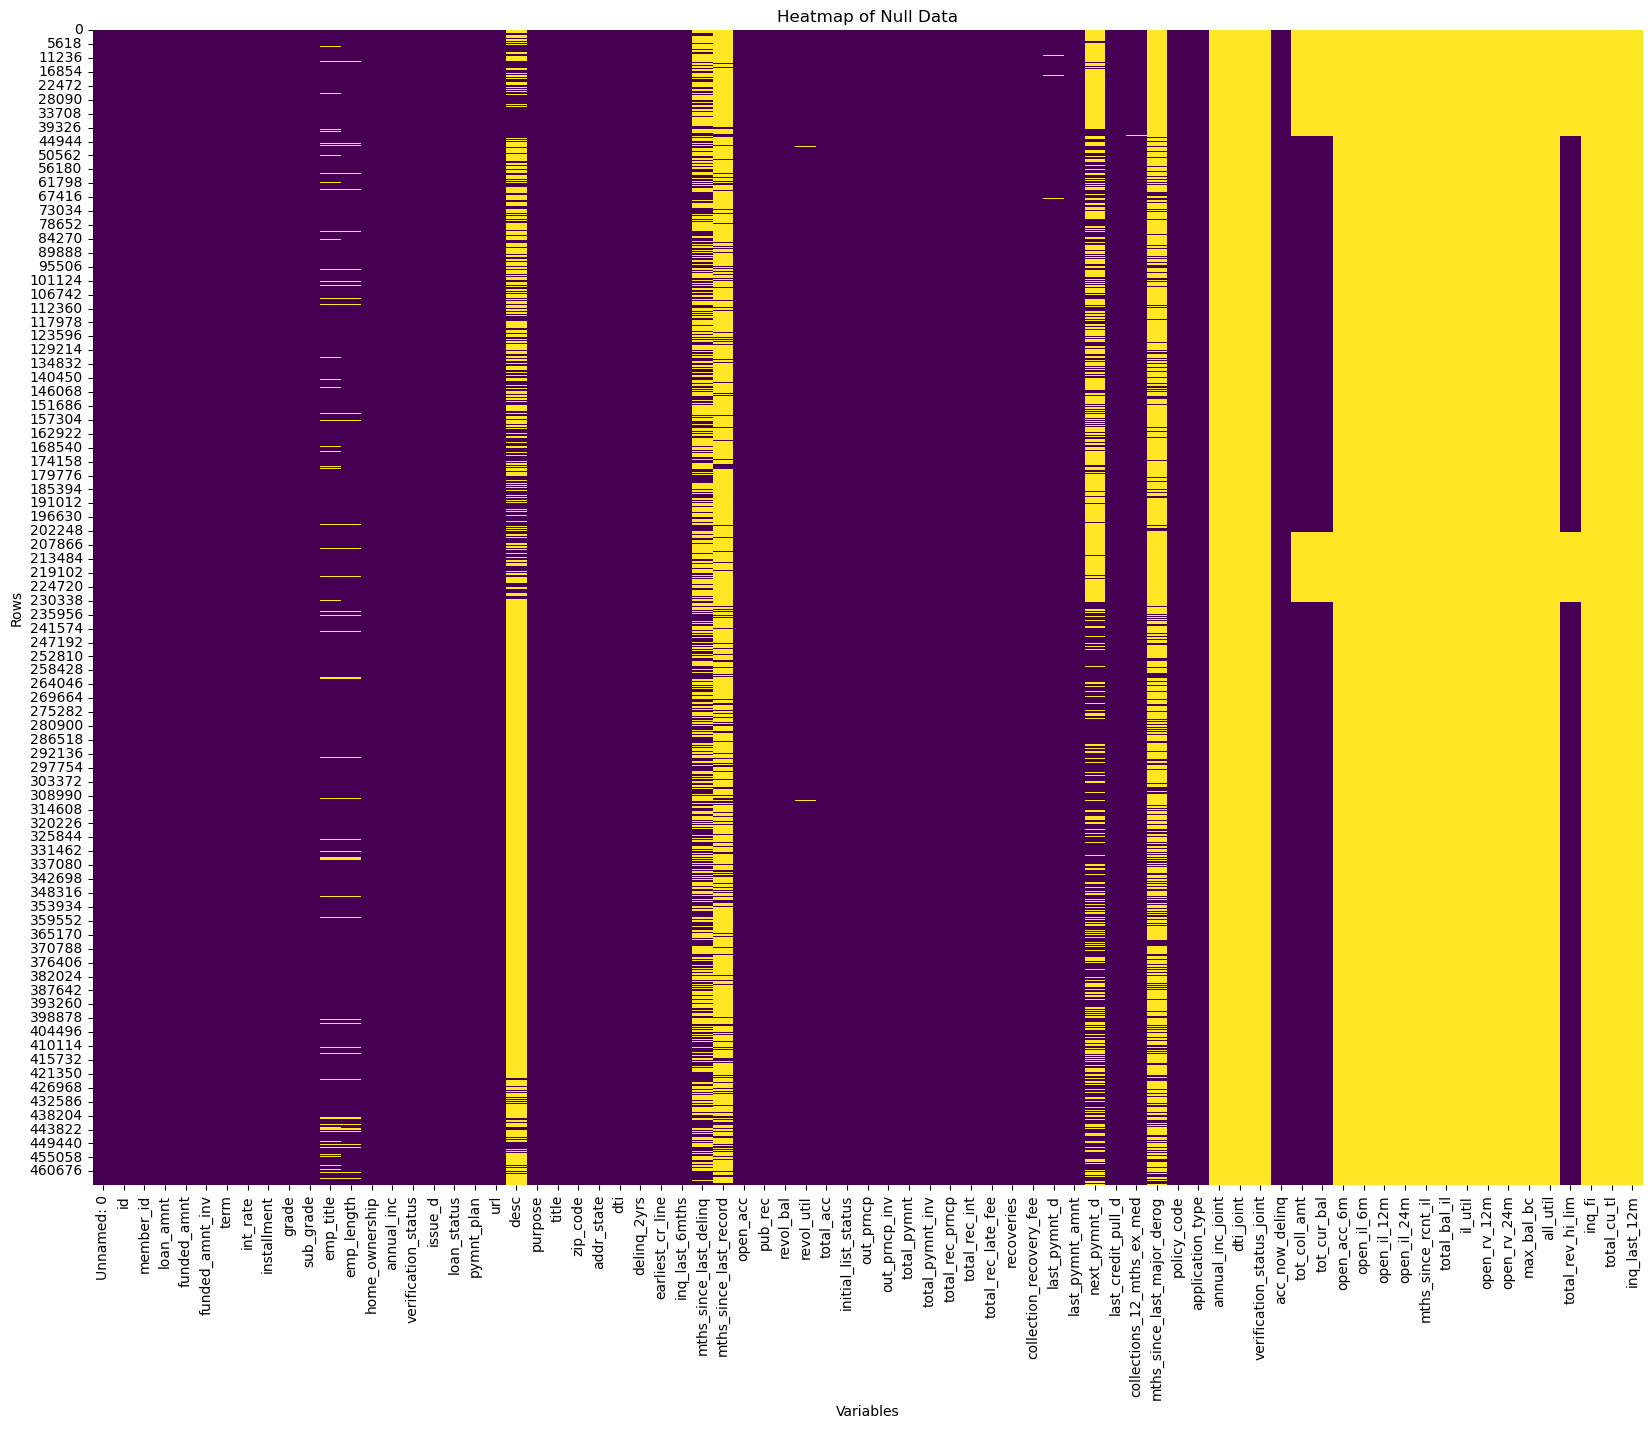

In [7]:
#Checking the distribution of outlier data using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Null Data')
plt.xlabel('Variables')
plt.ylabel('Rows')
plt.show()

Based on the heat map:
- emp_title, emp_lenghtwill,and revo_util drop null because the characteristic of missing value is Missing completely at random

- Desc and next payment will be drop because the missing value is also Missing completely at random but since it is categorical data, we can drop these column

- 'mths_since_last_delinq', 'mths_since_last_record','mths_since_last_major_derog'  will drop the column because have a lot of missing value. 
- tot_coll_amt , tot_cur_bal , total_rev_hi_lim will be impute with 0 because the characteristic of missing value is Missing not at random.
- annual_inc_joint , dti_joint , verification_status_joint , open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il,il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, inq_fi, total_cu_tl, inq_last_12m will be drop column because is missing completely at random.
             



In [8]:
#dropping column
columns_drop = ['desc'                        ,
'next_pymnt_d',
'mths_since_last_record'      ,
'mths_since_last_delinq'         ,
'mths_since_last_major_derog' ,
'annual_inc_joint'            ,
'dti_joint'                   ,
'verification_status_joint'   ,
'open_acc_6m'                 ,
'open_il_6m'                  ,
'open_il_12m'                 ,
'open_il_24m'                 ,
'mths_since_rcnt_il'          ,
'total_bal_il'                ,
'il_util'                     ,
'open_rv_12m'                 ,
'open_rv_24m'                 ,
'max_bal_bc'                  ,
'all_util'                    ,
'inq_fi'                      ,
'total_cu_tl'                 ,
'inq_last_12m'                ]

df.drop(columns=columns_drop,axis=1,inplace=True)

In [9]:
#imputing specific column with 0 values
impute_columns = ['tot_coll_amt' , 'tot_cur_bal' , 'total_rev_hi_lim']

for kolom in impute_columns:
    df[kolom] = df[kolom].fillna(0)

In [10]:
#drop the rest of null data
df.dropna(inplace=True)

In [11]:
#checking if there any null data
df.isna().any().sum()

0

we can see from the result, there is no missing value.

In [12]:
df.shape

(437709, 53)

We can observe that the data has reduced from 466,285 entries to 437,709, and the number of columns has decreased from 75 to 53.

Since we acomplish handling missing value, we can move to changing datatype

## __Changing Datatype__

In this process, the data types of numerical columns will be adjusted to ensure smooth exploration during analysis.

In [13]:
#showing the unique value from every columns
kols = []
unik = []

for kol in list(df.columns):
    unik_val = df[kol].unique()

    kols.append(kol)
    unik.append(unik_val)

    print(kol)
    print(unik_val)


Unnamed: 0
['1' '3' '4' ... '466281' '466282' '466283']
id
['1077430' '1076863' '1075358' ... '9684700' '9584776' '9604874']
member_id
['1314167' '1277178' '1311748' ... '11536848' '11436914' '11457002']
loan_amnt
['2500' '10000' '3000' ... '27775' '33175' '27925']
funded_amnt
['2500' '10000' '3000' ... '33175' '31725' '27925']
funded_amnt_inv
['2500.0' '10000.0' '3000.0' ... '30275.0' '33125.0' '33625.0']
term
[' 60 months' ' 36 months']
int_rate
['15.27' '13.49' '12.69' '7.9' '15.96' '18.64' '14.65' '9.91' '10.65'
 '16.29' '6.03' '11.71' '12.42' '16.77' '8.9' '7.51' '6.62' '19.91'
 '17.27' '14.27' '21.28' '17.58' '21.67' '19.42' '22.06' '20.89' '18.25'
 '20.3' '23.91' '19.03' '23.52' '23.13' '22.74' '22.35' '24.11' '6.0'
 '22.11' '7.49' '11.99' '5.99' '10.99' '9.99' '18.79' '11.49' '15.99'
 '16.49' '6.99' '12.99' '15.23' '14.79' '8.49' '5.42' '17.49' '10.59'
 '15.62' '21.36' '19.29' '13.99' '18.39' '16.89' '17.99' '20.62' '20.99'
 '22.85' '19.69' '20.25' '23.22' '21.74' '22.48' '23.5

In [14]:
#List of column based on the type of numerical data

int = ['Unnamed: 0','id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','annual_inc','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc','collections_12_mths_ex_med','policy_code','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

flt = ['int_rate','installment','dti','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']

In [15]:
#syntax for change the datatype
for integer in int:
    df[integer] = df[integer].astype('float64')
    df[integer] = df[integer].astype('int')



for float in flt:
    df[float] = df[float].astype('float')


In some cases, data is first converted to float before being converted to integer because certain numerical values may have the format ".0" but are not inherently decimal numbers. Therefore, they cannot be directly converted to integers and must first be converted to float and then to integer. This is necessary to ensure accurate representation and avoid potential loss of information during the conversion process.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437709 entries, 1 to 466283
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  437709 non-null  int32  
 1   id                          437709 non-null  int32  
 2   member_id                   437709 non-null  int32  
 3   loan_amnt                   437709 non-null  int32  
 4   funded_amnt                 437709 non-null  int32  
 5   funded_amnt_inv             437709 non-null  int32  
 6   term                        437709 non-null  object 
 7   int_rate                    437709 non-null  float64
 8   installment                 437709 non-null  float64
 9   grade                       437709 non-null  object 
 10  sub_grade                   437709 non-null  object 
 11  emp_title                   437709 non-null  object 
 12  emp_length                  437709 non-null  object 
 13  home_ownership     

the datatype is correct. we can move to EDA.

# Exploratory Data Analysis (EDA)

In [17]:
#Assign new variables for exploratory data analysis (EDA) tasks.
eda = df.copy()

In [18]:
eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,437709.0,2.333945e+05,1.341856e+05,1.00,117287.00,234009.00,3.495760e+05,4.662830e+05
id,437709.0,1.313856e+07,1.091121e+07,55521.00,3642788.00,10120594.00,2.076923e+07,3.809811e+07
member_id,437709.0,1.465976e+07,1.170089e+07,74724.00,4418034.00,11953348.00,2.303356e+07,4.086083e+07
loan_amnt,437709.0,1.444279e+04,8.278534e+03,500.00,8000.00,12375.00,2.000000e+04,3.500000e+04
funded_amnt,437709.0,1.441745e+04,8.267109e+03,500.00,8000.00,12325.00,2.000000e+04,3.500000e+04
funded_amnt_inv,437709.0,1.434879e+04,8.290353e+03,0.00,8000.00,12175.00,2.000000e+04,3.500000e+04
int_rate,437709.0,1.382395e+01,4.358291e+00,5.42,10.99,13.66,1.649000e+01,2.606000e+01
installment,437709.0,4.349825e+02,2.428151e+02,15.67,260.49,382.99,5.699500e+02,1.409990e+03
annual_inc,437709.0,7.412606e+04,5.517243e+04,1896.00,45500.00,64000.00,9.000000e+04,7.500000e+06
dti,437709.0,1.721679e+01,7.813355e+00,0.00,11.40,16.87,2.275000e+01,3.999000e+01


## Distribution of Funded Amount from Last Month Credit

<Axes: title={'center': 'funded_amnt'}>

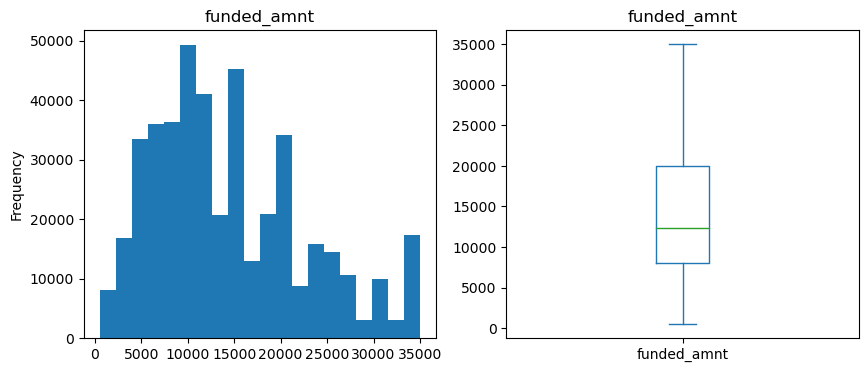

In [19]:
#Displays a histogram and boxplot in the funded_amnt column
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

eda['funded_amnt'].plot(kind='hist',bins=20,ax=ax[0],title='funded_amnt')
eda['funded_amnt'].plot(kind='box',ax=ax[1],title='funded_amnt')


In [20]:
# Assign formulas for mean and median
mean_score = eda['funded_amnt'].mean()
median_score = eda['funded_amnt'].median()
min_score = eda['funded_amnt'].min()
skewness_score = eda['funded_amnt'].skew()

# Displaying the mean and median values in the funded_amnt column.
print(f'Minimum score: {min_score}')
print(f'Mean score: {mean_score}')
print(f'Median score: {median_score}')
print(f'Skewness score: {skewness_score}')

Minimum score: 500
Mean score: 14417.452177131381
Median score: 12325.0
Skewness score: 0.72264321172907


__Explanation__

Based on the histogram visualization, there are no visible outliers in the data. However, examining the skewness value, this column has a skewness of 0.722, indicating positive skewness and a distribution that is relatively left-skewed.

This means that the distribution of approved credit by the financial company to customers is relatively balanced. There are borrowers with small, medium, and large loan amounts, resulting in no outliers in this column.

## Distribution of Customer's Monthly Installment

<Axes: title={'center': 'installment'}>

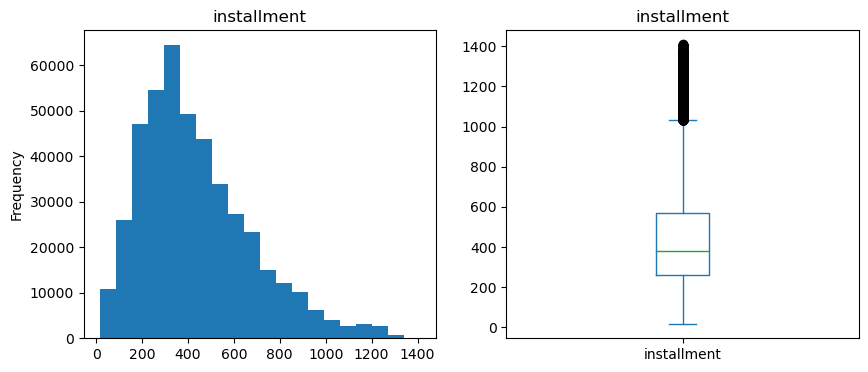

In [21]:
#Display histograph and boxplot in the installment column
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

eda['installment'].plot(kind='hist',bins=20,ax=ax[0],title='installment')
eda['installment'].plot(kind='box',ax=ax[1],title='installment')

In [22]:
#assign formulas for mean and median
m = eda['installment'].mean()
me = eda['installment'].median()
mi = eda['installment'].min()
sk = eda['installment'].skew()

#display the mean and median values in the installment column.
print(f'Minimum score: {mi}')
print(f'Mean score: {m}')
print(f'Median score: {me}')
print(f'Skewness value: {sk}')


Minimum score: 15.67
Mean score: 434.98254385904795
Median score: 382.99
Skewness value: 0.939207088317361


__Explanation__

In this column, there are outliers as depicted in the histogram visualization. The skewness value of 0.939 indicates significant positive skewness, meaning the distribution is heavily left-skewed.

Although the credit amounts approved by the bank vary, the credit payments are adjusted to match the customers' ability to pay. The barplot graph shows that most customers can pay within the range of 380-400, which aligns with the median and mean values.

## Scatterplot Visualization for the Amount Funded by the Monthly Installment

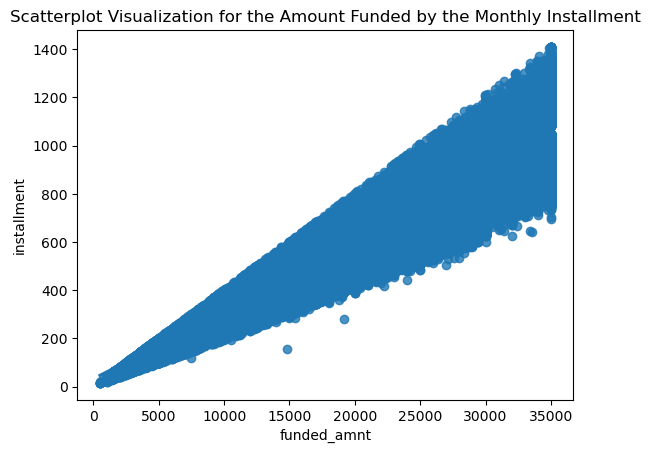

In [23]:
#syntax for scatterplot visualization with seaborn
sns.regplot(x=eda["funded_amnt"], y=eda["installment"])
plt.xlabel('funded_amnt')
plt.ylabel('installment')
plt.title('Scatterplot Visualization for the Amount Funded by the Monthly Installment')
plt.show()


__Explanation__

Based on this visualization, there is a linear correlation between the amount of credit provided by the bank and the monthly installment payments. As the amount of credit increases, the monthly installment payments also increase. However, there is a noticeable gap between 800 and 1400 in the monthly installment amounts provided by the financial company to customers. This means that each customer can receive different installment amounts for the same credit value applied for.

## Comparison of Total Loan Terms Received by Customers

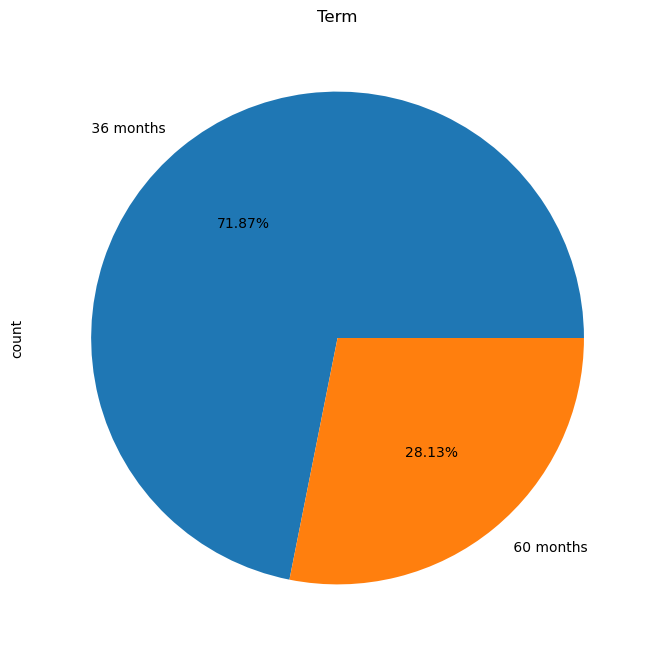

In [24]:
#syntax to display Comparison of Total Loan Terms Recieved By customers
fig,ax1 = plt.subplots(figsize=(8,8))

df['term'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.title('Term')
plt.show()


From the visualization, it can be concluded that the majority of customers receive a 36-month loan term, while only 28.13% of customers receive a 60-month loan term. Many factors influence these loan terms, such as credit score, length of time as a customer, and the amount borrowed.

## Comparison of Home Ownership Status among Customers

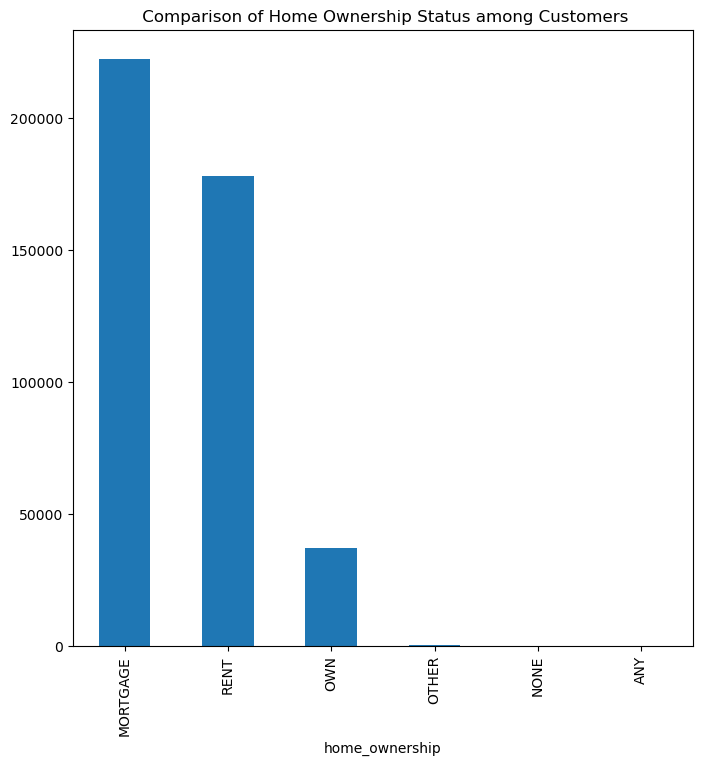

In [25]:
#syntax to display the home_ownership comparison
fig,ax1 = plt.subplots(figsize=(8,8))

df['home_ownership'].value_counts().plot(kind='bar')
plt.title(' Comparison of Home Ownership Status among Customers')
plt.show()

Based on the visualization above, the majority of customers have their homes mortgaged, followed by customers who rent their homes, and customers who own homes. There are fewer customers who chose options like "other", "none", and "any". Further analysis is needed to understand why the majority of customers have mortgaged homes. It could be because of using the home as collateral for debt, or other reasons that require deeper investigation.

## Comparison of Debt Purposes

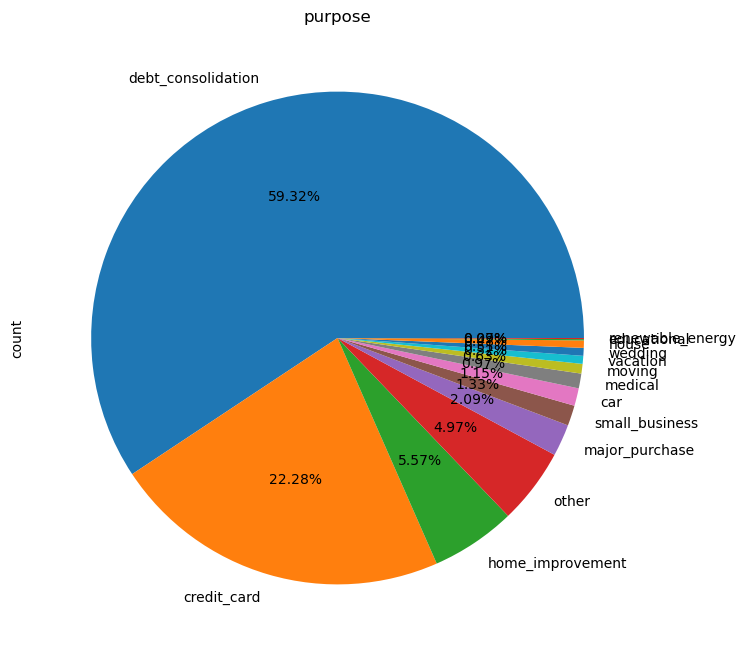

In [26]:
#syntax to display the Gender Number comparison
fig,ax1 = plt.subplots(figsize=(8,8))

eda['purpose'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.title('purpose')
plt.show()

Based on the pie chart, the majority of customers borrow from this company for debt consolidation, which involves consolidating various debts into one bill. Following that are credit card bills and home improvement. However, intuitively, there may be a relationship between the two. Customers who have mortgaged homes may be more inclined to seek solutions like debt consolidation to manage their debts by using their homes as collateral. However, this is an assumption and needs to be tested with the appropriate data to confirm.

## Comparison of the Number of Customers Grade

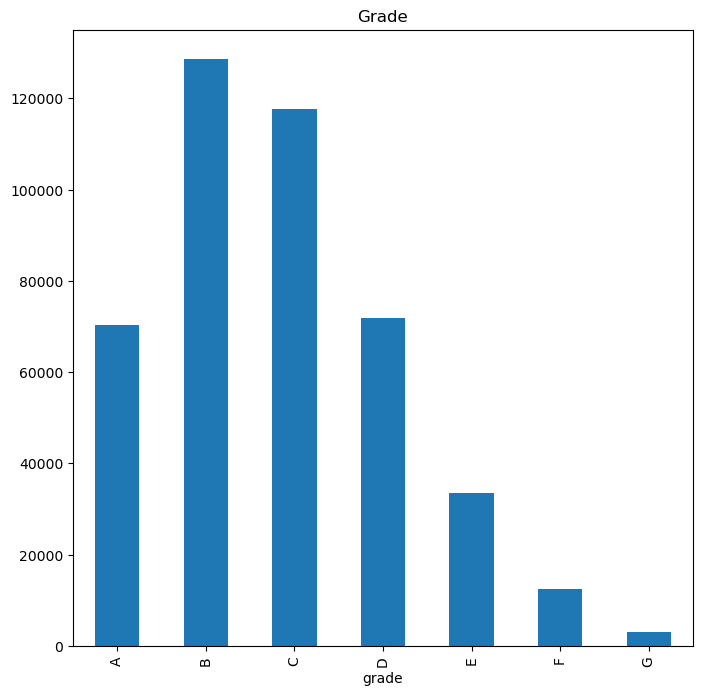

In [27]:
#syntax to display the Gender Grade comparison
fig,ax1 = plt.subplots(figsize=(8,8))

df['grade'].value_counts().sort_index().plot(kind='bar')
plt.title('Grade')
plt.show()

Based on the bar graph, the majority of customers have grades B and C. Customers who receive grade A are not as numerous as those with grades B and C. These grades reflect the level of risk associated with borrowers, with lower values indicating lower risk and higher values indicating higher risk. 

These grades are often used to determine the interest rates to be applied to loans. Borrowers with grade A may be offered lower interest rates than borrowers with grade C or D. These grades can also affect loan approval or rejection.

As such, customers with grades D to G may likely be borrowers who have debts but have not made payments or have been late in payments, resulting in low grades. Grades A to C represent customers with relatively good credit scores because of their good credit habits such as timely payments, borrowing regularly, and borrowing large amounts that are repaid.

## Scatterplot Visualization of Total Payments versus Total Received Interest

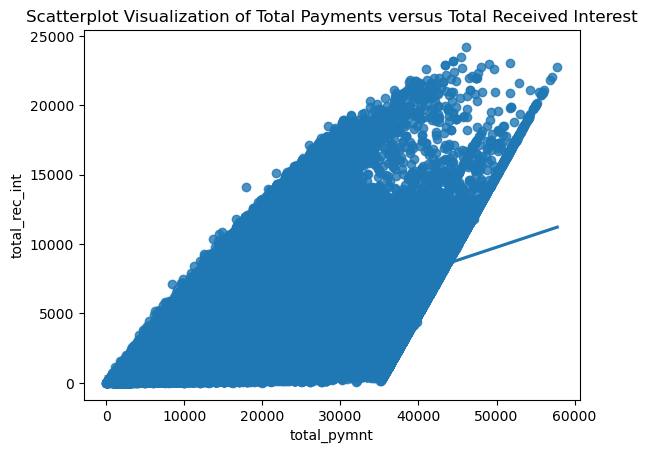

In [28]:
#syntax for scatterplot visualization with seaborn
sns.regplot(x=eda["total_pymnt"], y=eda["total_rec_int"])
plt.xlabel('total_pymnt')
plt.ylabel('total_rec_int')
plt.title('Scatterplot Visualization of Total Payments versus Total Received Interest')
plt.show()


The scatterplot shows a positive correlation between total payments and total received interest. Customers making higher payments tend to receive more interest, possibly due to borrowing larger amounts. However, correlation doesn't imply causation, and other factors may influence both variables.

## Comparison of Customer's Loan Status

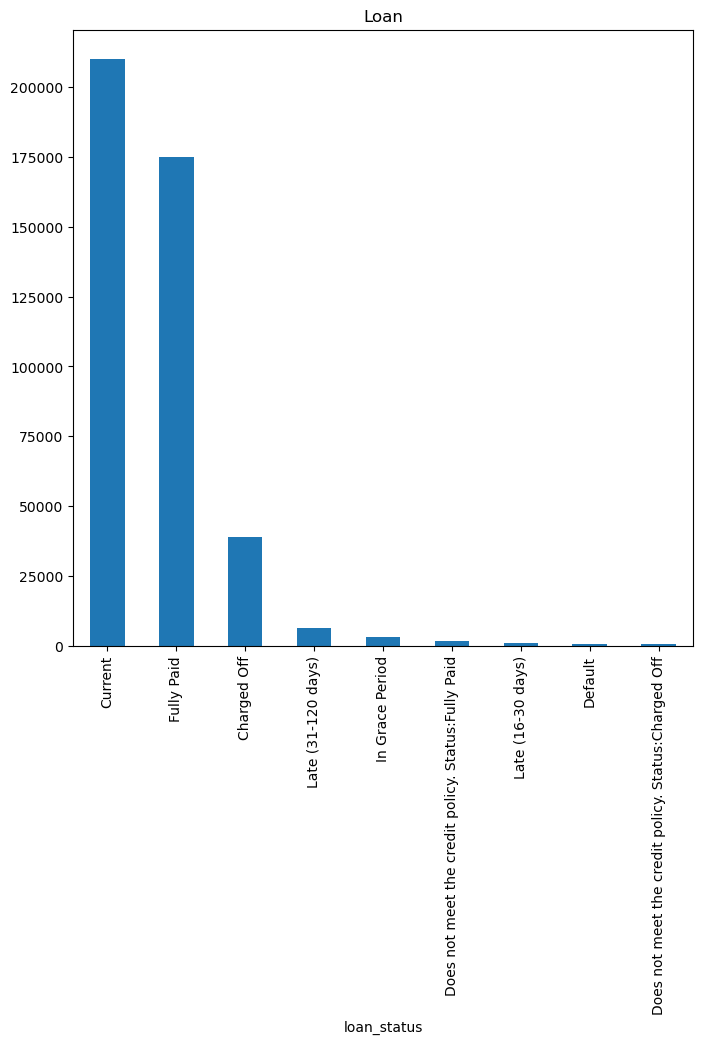

In [29]:
#syntax to display the Gender Number comparison
fig,ax1 = plt.subplots(figsize=(8,8))

eda['loan_status'].value_counts().plot(kind='bar')
plt.title('Loan')
plt.show()

Based on the visualization, the majority of customers haven't completed their credit payments, followed by those who have fully paid off their credit and those whose credits have been charged off or transferred to someone else. There are fewer customers who are late in payments (1 to 3 months), in grace period, have paid but not according to credit regulations, late by 1 month, failed to pay, and charged off but not according to credit regulations.

This column is the target to be used, so to simplify predictive modeling, the values in this column will be combined into 2 columns: "Paid" and "Unpaid". The loan_status column will be divided into two main categories: "Fully Paid" and "Default" (Failed to Pay), depending on the analysis objectives and needs. For instance, categories like "Charged Off", "Default", "Late (31-120 days)", "Late (16-30 days)", and "Does not meet the credit policy. Status Off" can be combined into one category "Default", while other categories like "Fully Paid", "Current", "In Grace Period", and "Does not meet the credit policy. Status Paid" can be combined into "Fully Paid".

__To Do:__
- Combine values from the Loan_status column.

## Correlation Heatmap of Selected Loan Features and Financial Metrics

Text(0.5, 1.0, 'Correlation Heatmap of Selected Loan Features and Financial Metrics')

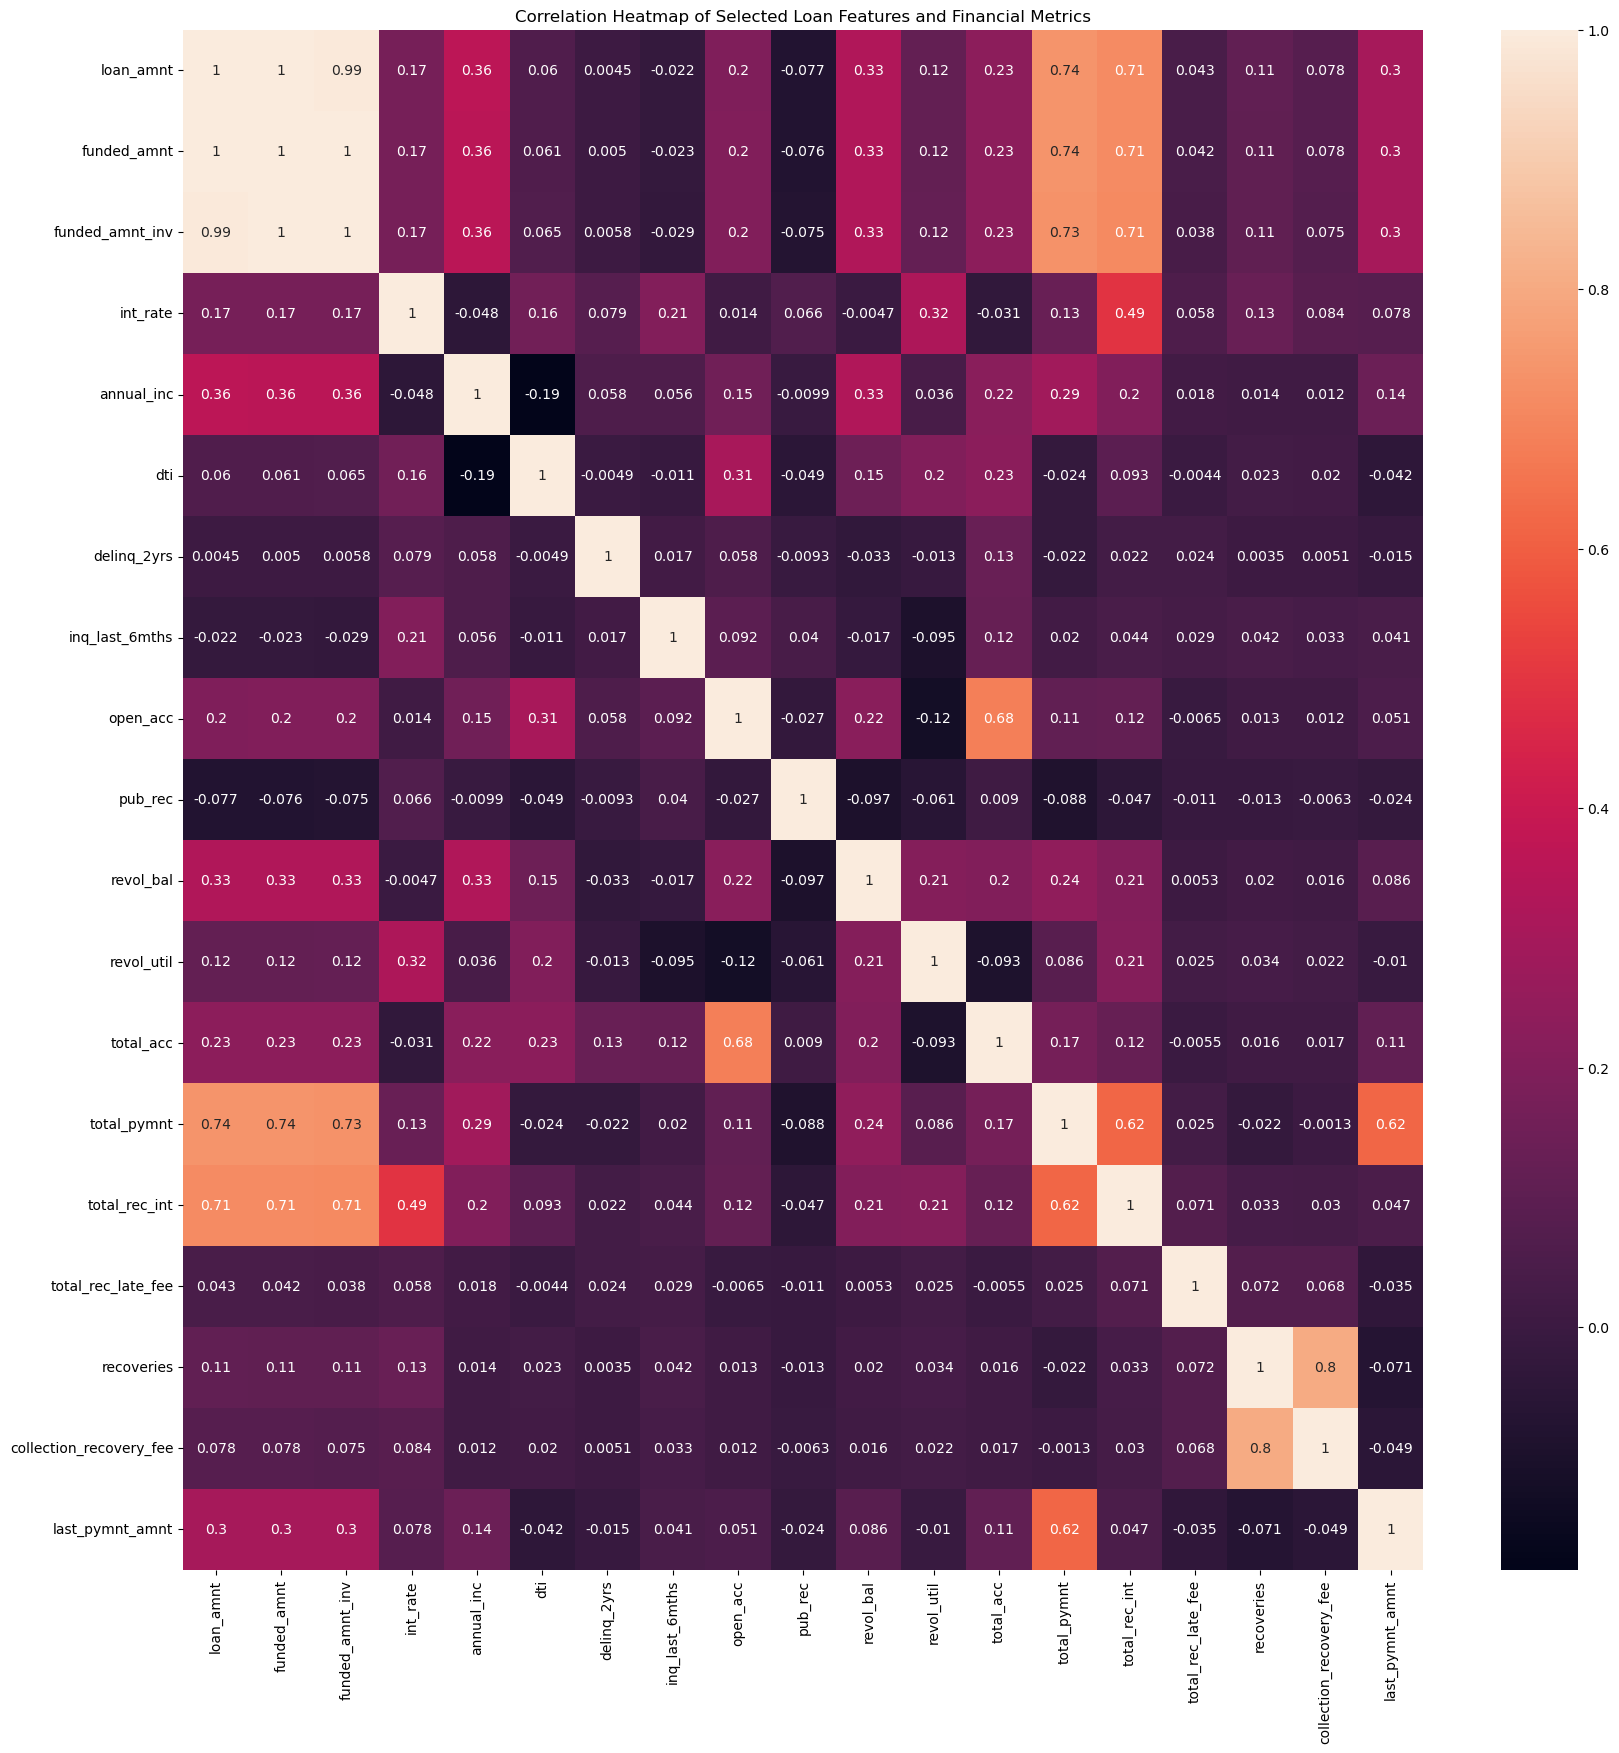

In [30]:
fig, axes = plt.subplots( figsize=(20, 20))

sns.heatmap(eda[[
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'annual_inc',
    'dti', 'delinq_2yrs', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
    'last_pymnt_amnt'
]].corr(),annot=True)
plt.title('Correlation Heatmap of Selected Loan Features and Financial Metrics')

__Explaination__
- High positive correlations exist between loan amounts, funded amounts, and total payments received, indicating that larger loans result in higher payments.
- Borrower's annual income moderately correlates with requested loan amounts.
- Interest rates moderately influence the amount of interest received.
- Recent payment delinquencies and adverse public records have minimal impact on loan amounts.
- Borrowers with higher revolving credit balances tend to request larger loan amounts.
- Borrowers with higher debt-to-income ratios tend to utilize more revolving credit.


# Feature Engineering

## Handling cardinality

In [31]:
df.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
1,1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0
3,3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0,1,INDIVIDUAL,0,0,0,0
4,4,1075358,1311748,3000,3000,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0,1,INDIVIDUAL,0,0,0,0
5,5,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,Sep-15,0,1,INDIVIDUAL,0,0,0,0
6,6,1069639,1304742,7000,7000,7000,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004,Not Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.6,11,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,Jan-16,170.08,Jan-16,0,1,INDIVIDUAL,0,0,0,0


In [32]:
#to display unique values from categorical (and numeric) columns
cat = (df.select_dtypes(include=['object','datetime64']).columns)

listItem = []
for col in cat:
  listItem.append([col, df[col].nunique()])

pd.DataFrame(columns=['column name', 'number of unique values'], data=listItem)

,column name,number of unique values
0,term,2
1,grade,7
2,sub_grade,35
3,emp_title,204992
4,emp_length,11
5,home_ownership,6
6,verification_status,3
7,issue_d,89
8,loan_status,9
9,pymnt_plan,2


Based on calculations, results were obtained for high and low cardinality.  
>High cardinality = sub_grade, emp_title, issue_d, url, title, zip_code, addr_state, earliest_cr_line, last_pymnt_d, last_credit_pull_d  
>low cardinality = term, grade, emp_length, home_ownership,verification_status, loan_status, pymnt_plan, purpose, initial_list_status, application_type

Based on the results, we should consider dropping columns with high cardinality before applying the logistic regression model. High cardinality columns can make it challenging for the model to learn from the dataset due to the increased dimensionality.

In [33]:
high_cardinality_col = ['sub_grade', 'emp_title', 'issue_d', 'url', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
df.drop(columns=high_cardinality_col,inplace=True,axis=1)

In [34]:
df.head(1)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
1,1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000,Source Verified,Charged Off,n,car,1.0,0,5,3,0,1687,9.4,4,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,0,1,INDIVIDUAL,0,0,0,0


We already drop high cardinality column, we can next step.

## Split X dan Y

In [35]:
df.loan_status.unique()

array(['Charged Off', 'Fully Paid', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

The target variable we aim to predict is whether customers are approved for credit or not.  
y = loan_status  

In [36]:
fully_paid = ['Fully Paid','Current','In Grace Period','Does not meet the credit policy. Status:Fully Paid']
default = ['Default','Charged Off','Late (31-120 days)','Late (16-30 days)','Does not meet the credit policy. Status:Charged Off']

In [37]:
#The target value has already been combined and encoded.
df['loan_status'] = df['loan_status'].replace(fully_paid, 0)
df['loan_status'] = df['loan_status'].replace(default, 1)


In [38]:
df.loan_status.value_counts()

loan_status
0    389882
1     47827
Name: count, dtype: int64

We can see from this result that the target has already been combined and encoded. but the data is imbalanced. 

__To Do :__
Balancing data with Smote

In [39]:
#separation of features and targets
X = df.drop(['loan_status'], axis = 1)
y = df['loan_status']

In [40]:
#separation between train dataset and test dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 30)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (262625, 42)
Test Size:  (175084, 42)


In [41]:
#separation between test dataset and test dataset.

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.50, random_state = 30)
print('Val Size: ', X_val.shape)
print('Test Size: ', X_test.shape)

Val Size:  (87542, 42)
Test Size:  (87542, 42)


This model uses 60%/262625 data for training from the dataset and will be tested with 20%/43771 data.And also using validation data uses 20%/43771 data. why use this comparison to reduce the possibility of overfitting and lowfitting models.

## Handling Outlier

In [42]:
#syntax to find out the skew value and type of skewness
num_cols = list(X_train.select_dtypes(exclude=['object','datetime64']).columns)

kolom = []
skewnes = []
skews = []

for col in num_cols:
  skew = df[col].skew()
  kolom.append(col)

  if skew >= -0.5 and skew <= 0.5:
    skewnes.append('normal')
  else:
    skewnes.append('skew')
  skews.append(skew)

kolskew = pd.DataFrame({'nama_kolom' : kolom , 'skewness' : skewnes,'Nilai skewness':skews })
kolskew



,nama_kolom,skewness,Nilai skewness
0,Unnamed: 0,normal,-0.007959
1,id,skew,0.681462
2,member_id,skew,0.610880
3,loan_amnt,skew,0.718759
4,funded_amnt,skew,0.722643
5,funded_amnt_inv,skew,0.718203
6,int_rate,normal,0.337026
7,installment,skew,0.939207
8,annual_inc,skew,30.892573
9,dti,normal,0.189398


Below is a column that groups skewed and normal data. The distribution is skewed or normal, determined from a skew value that is greater than 0.5 or smaller than -0.5, then the value is skewed. Below this value can be called normal distribution. Based on the calculations above, there is no skew in the data for the numerical column. All data tends to have a normal distribution.

In [43]:
#column grouping
normal = list(kolskew[kolskew['skewness']== "normal"]['nama_kolom'])
skew = list(kolskew[kolskew['skewness']== "skew"]['nama_kolom'])

In [44]:
skew = ['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'last_pymnt_amnt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [45]:
normal = [ 'Unnamed: 0', 'int_rate', 'dti', 'revol_util','delinq_2yrs', 'pub_rec', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt']

### Proses Capping dengan Winsorizer

__Winsorizer untuk persebaran skew__

In [46]:
#syntax for handling outliers by capping using winsorizer for gaussian capping method


winsoriserskew = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables= skew,
                            missing_values='ignore')

X_train_capped = winsoriserskew.fit_transform(X_train)
X_test_capped = winsoriserskew.transform(X_test)

__Winsorizer untuk persebaran normal__

In [47]:
#syntax for handling outliers by capping using winsorizer for gaussian capping method

winsorisernorm = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables= normal,
                            missing_values='ignore')

X_train_capped = winsorisernorm.fit_transform(X_train)
X_test_capped = winsorisernorm.transform(X_test)

Columns with normal distribution have been successfully capped.

Unnamed: 0 - Before Capping


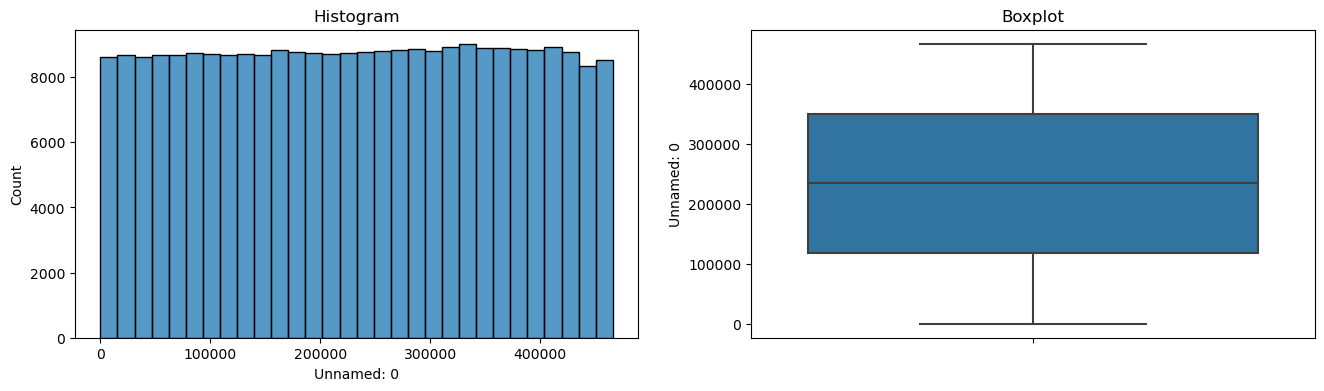


Unnamed: 0 - After Capping


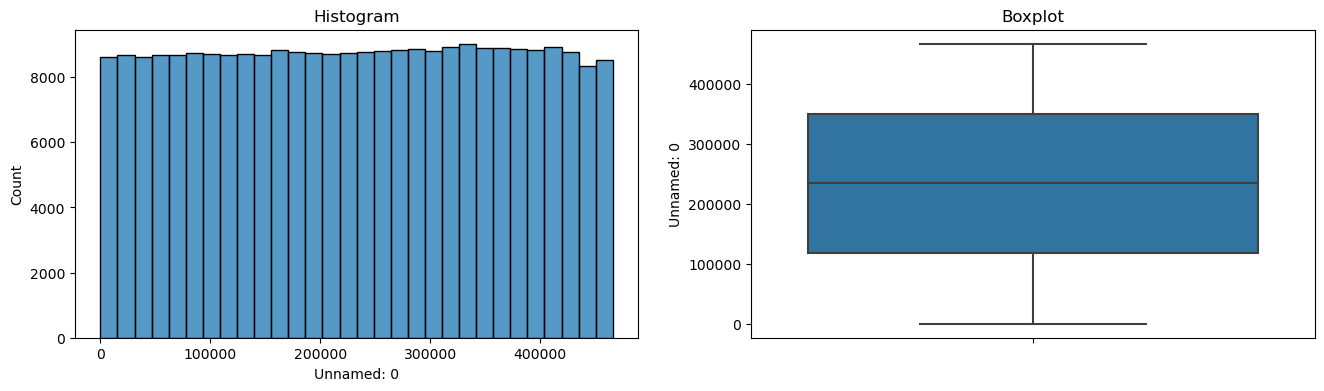

id - Before Capping


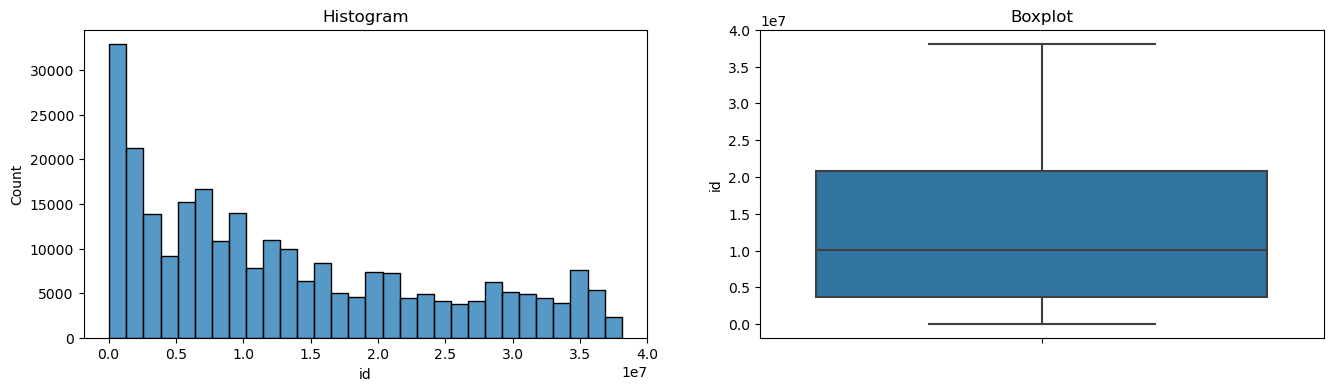


id - After Capping


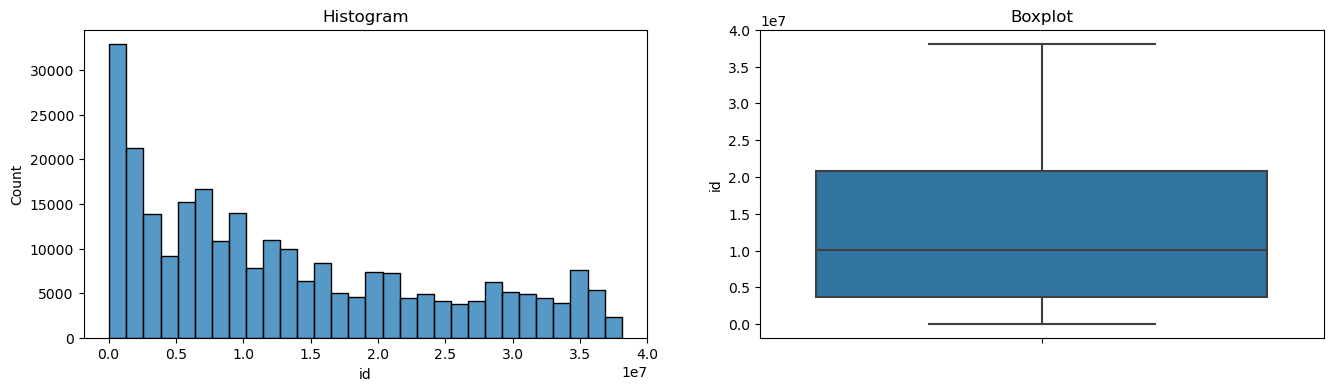

member_id - Before Capping


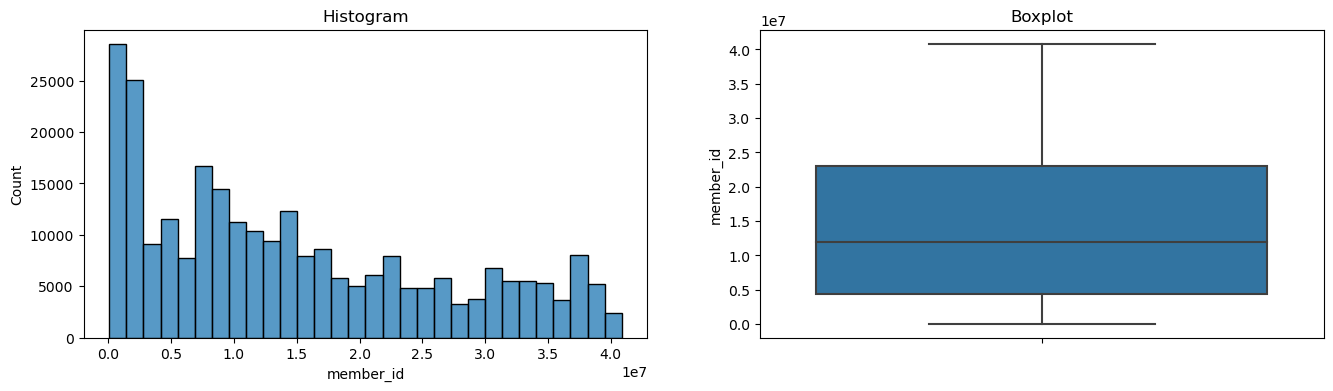


member_id - After Capping


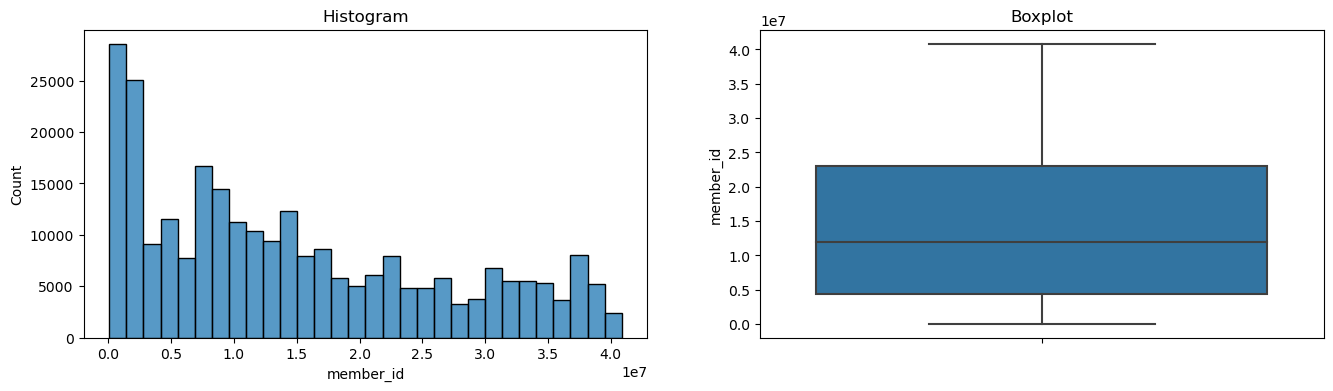

loan_amnt - Before Capping


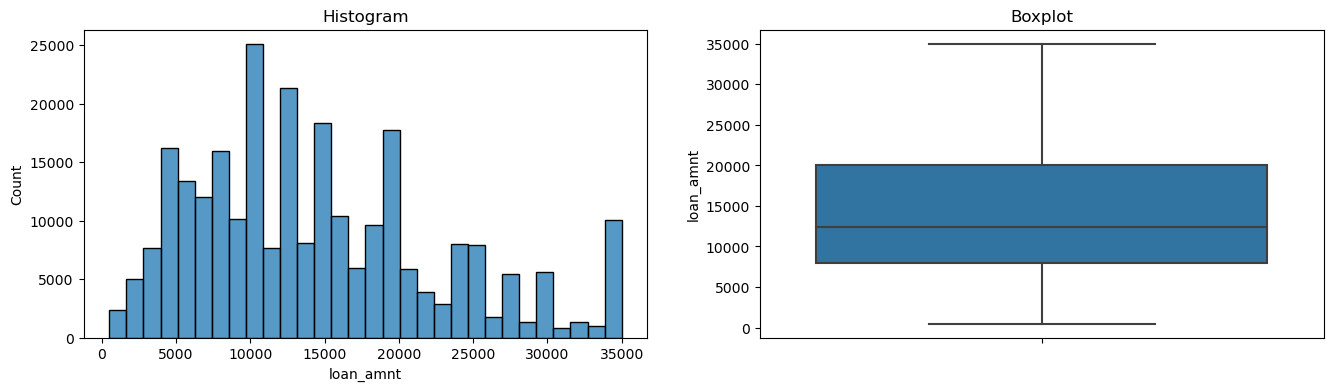


loan_amnt - After Capping


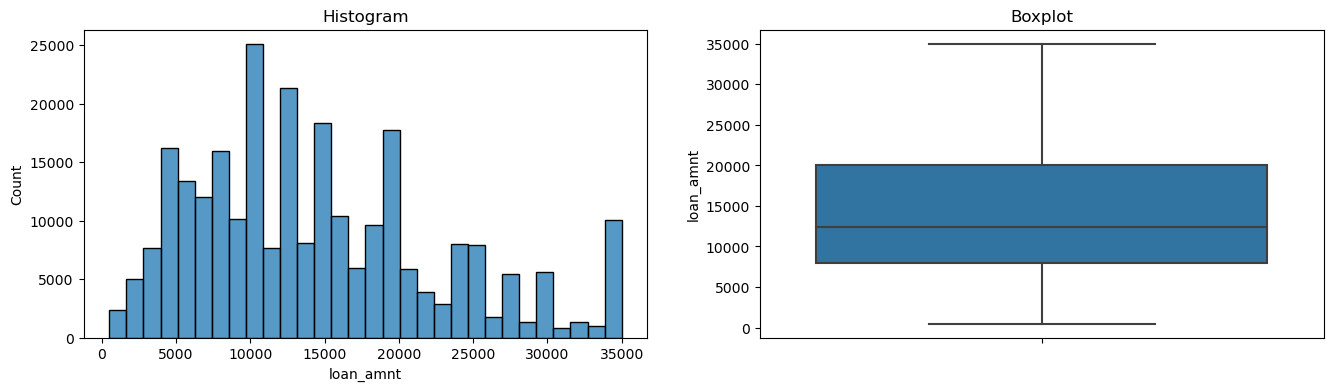

funded_amnt - Before Capping


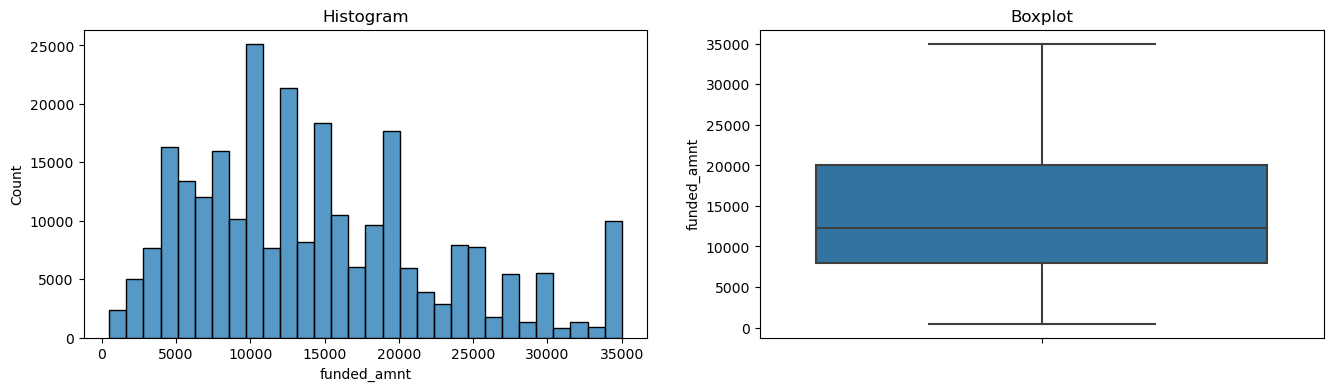


funded_amnt - After Capping


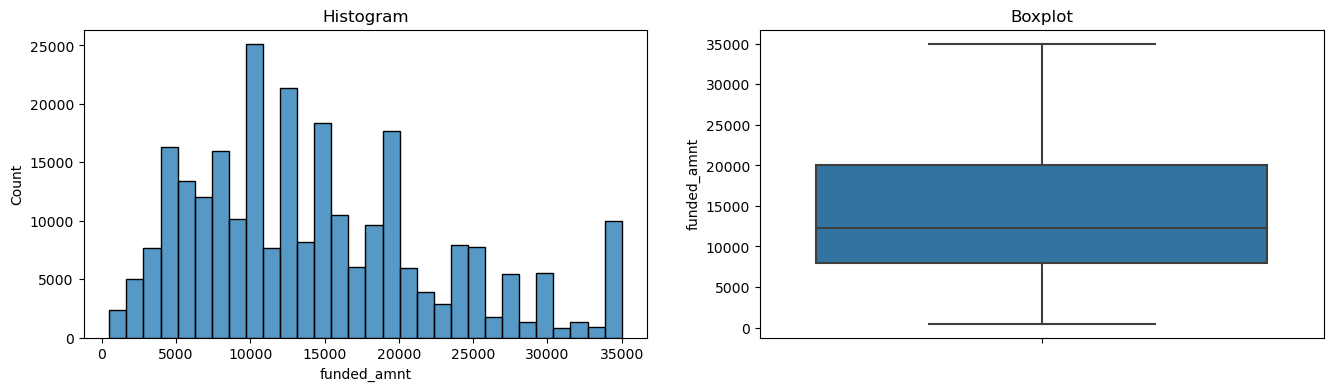

funded_amnt_inv - Before Capping


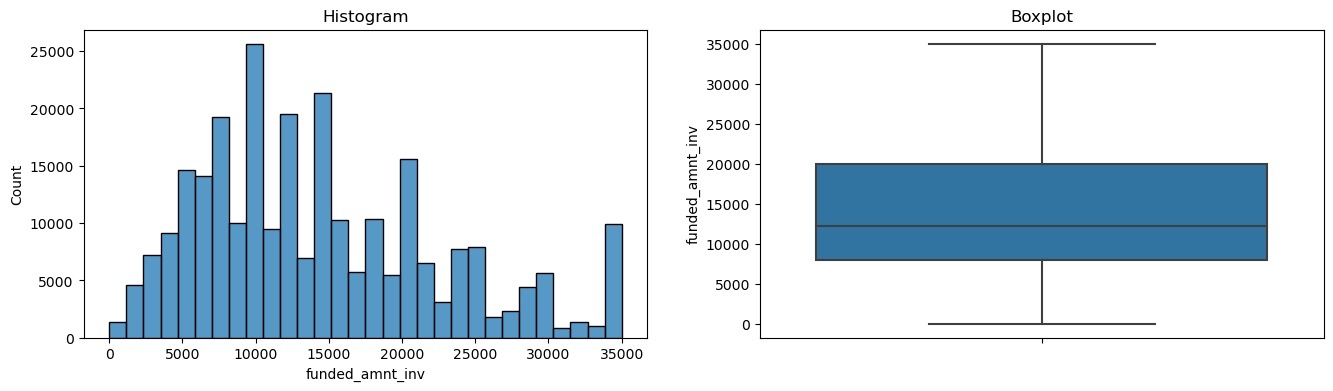


funded_amnt_inv - After Capping


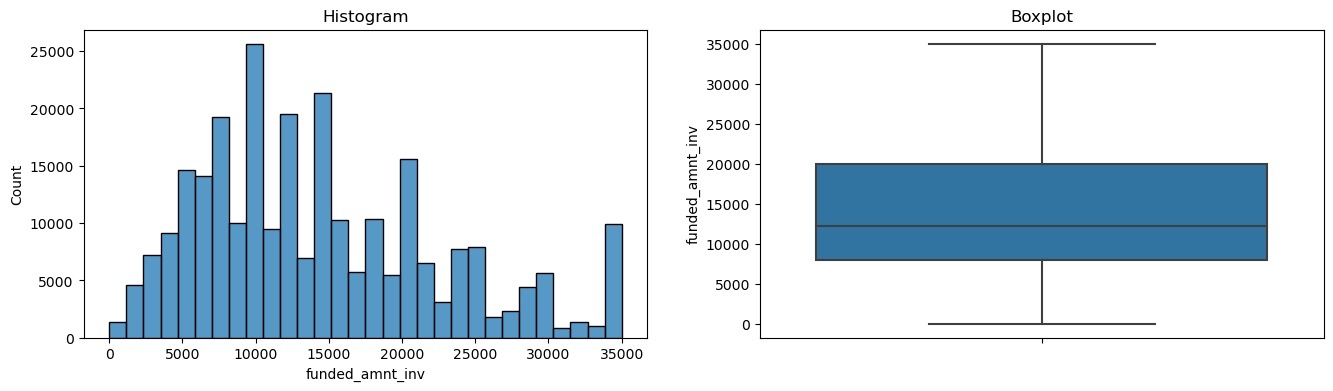

int_rate - Before Capping


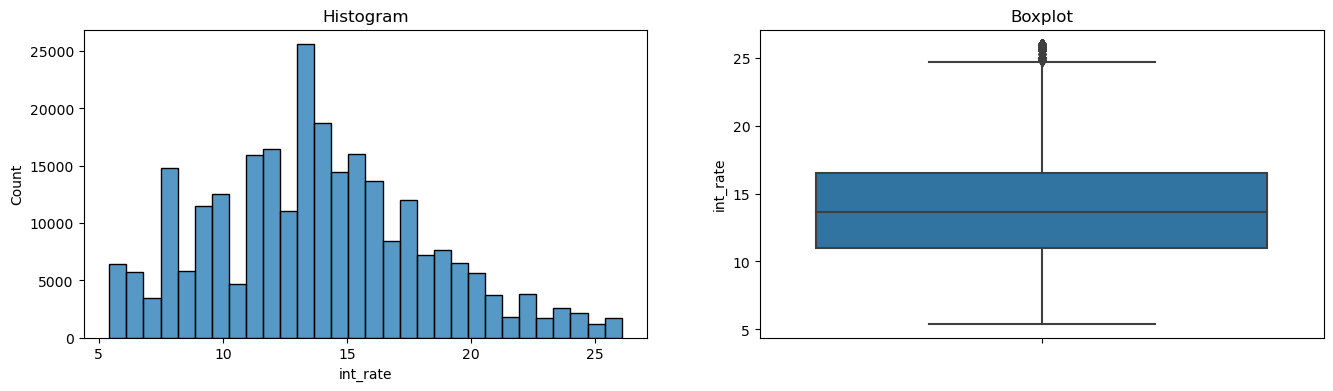


int_rate - After Capping


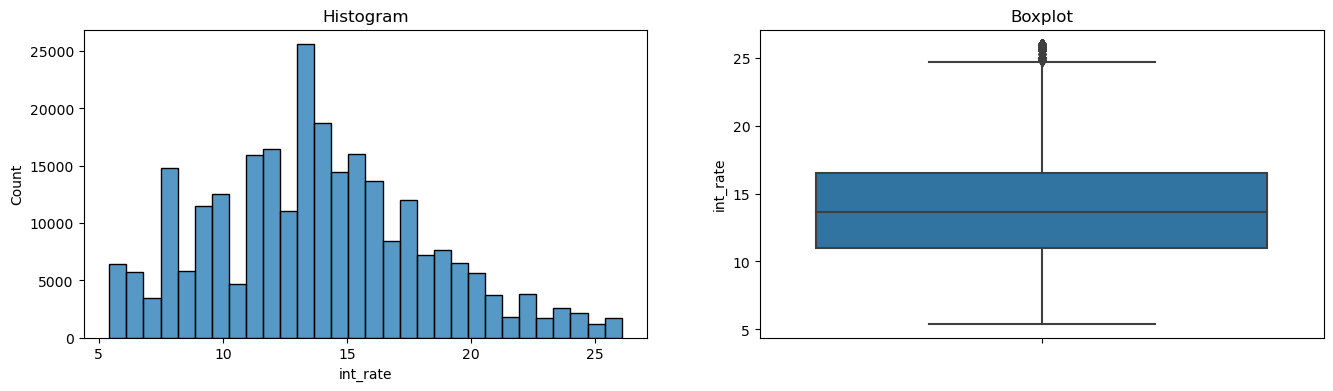

installment - Before Capping


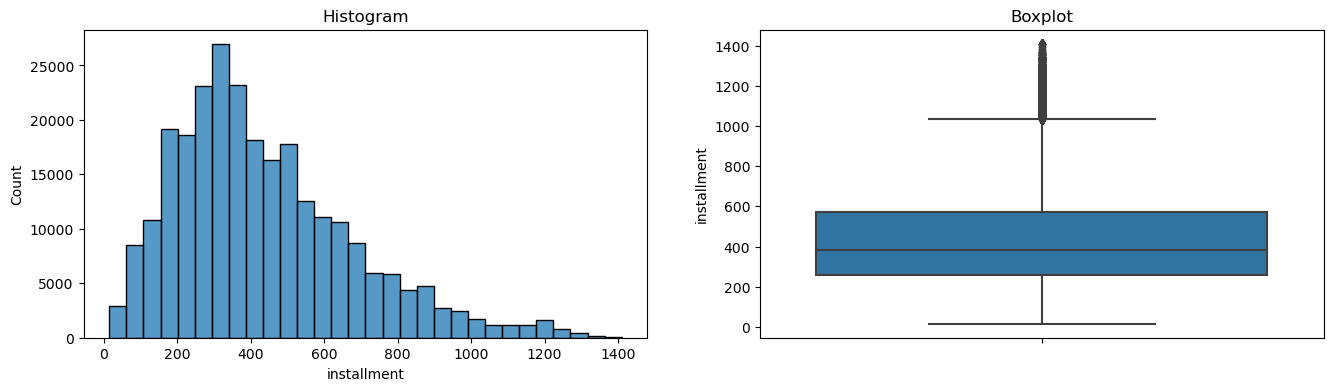


installment - After Capping


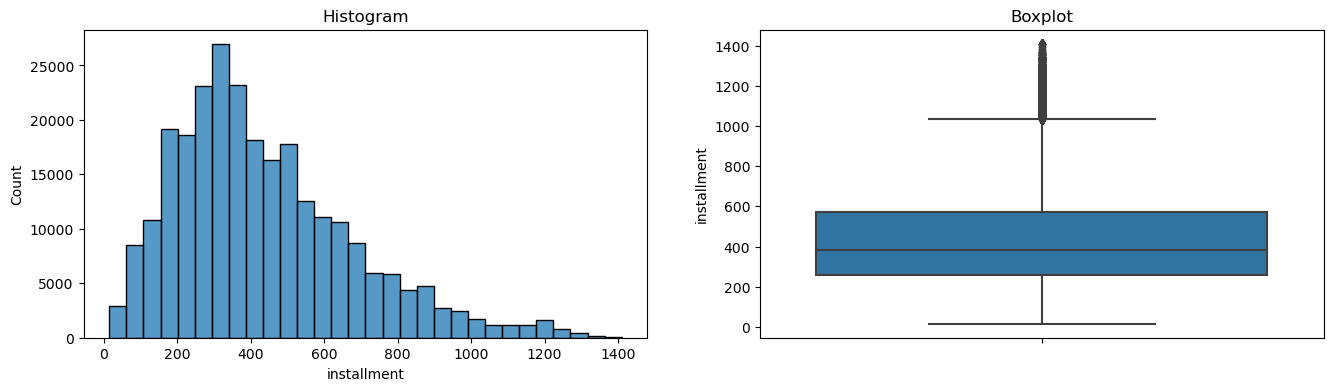

annual_inc - Before Capping


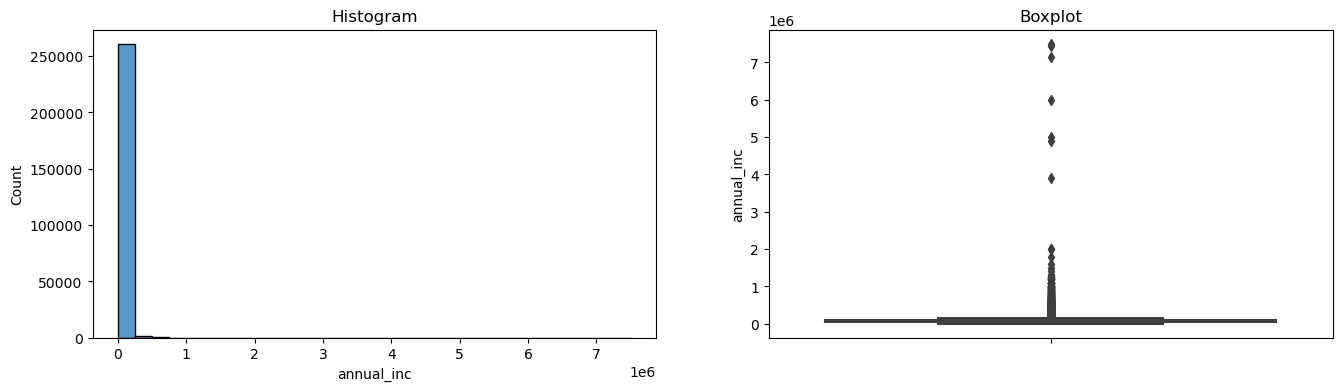


annual_inc - After Capping


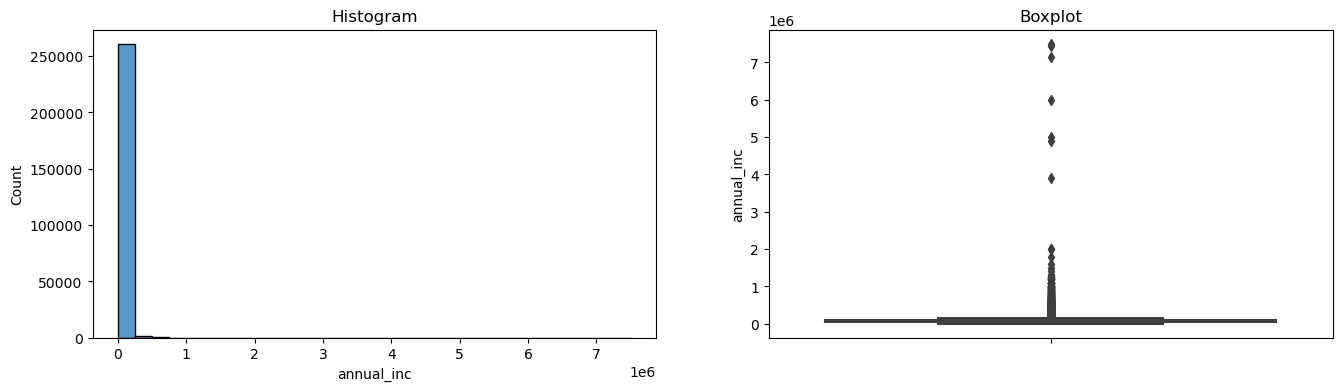

dti - Before Capping


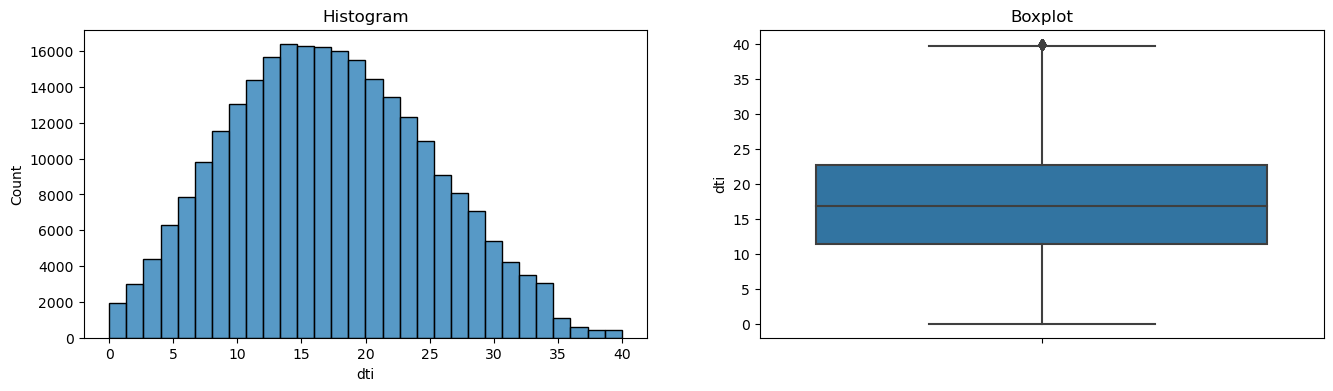


dti - After Capping


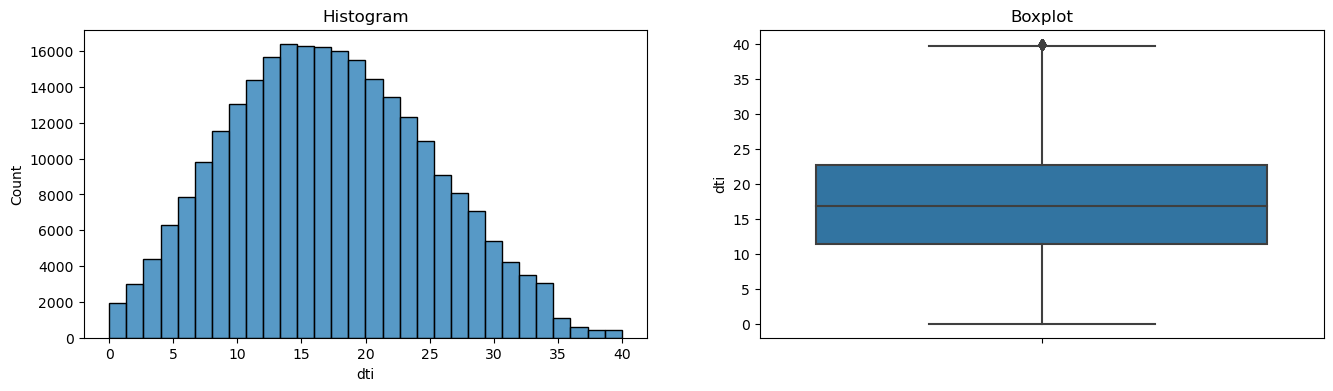

delinq_2yrs - Before Capping


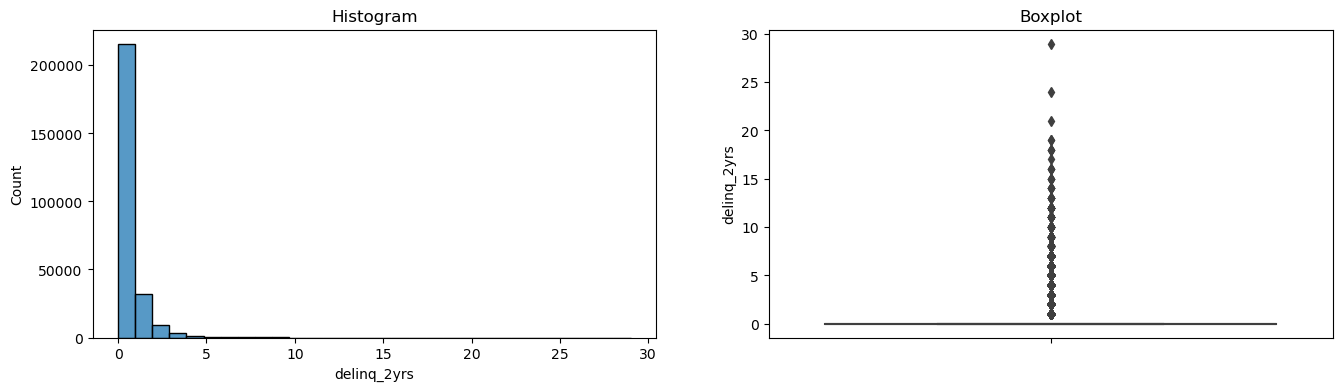


delinq_2yrs - After Capping


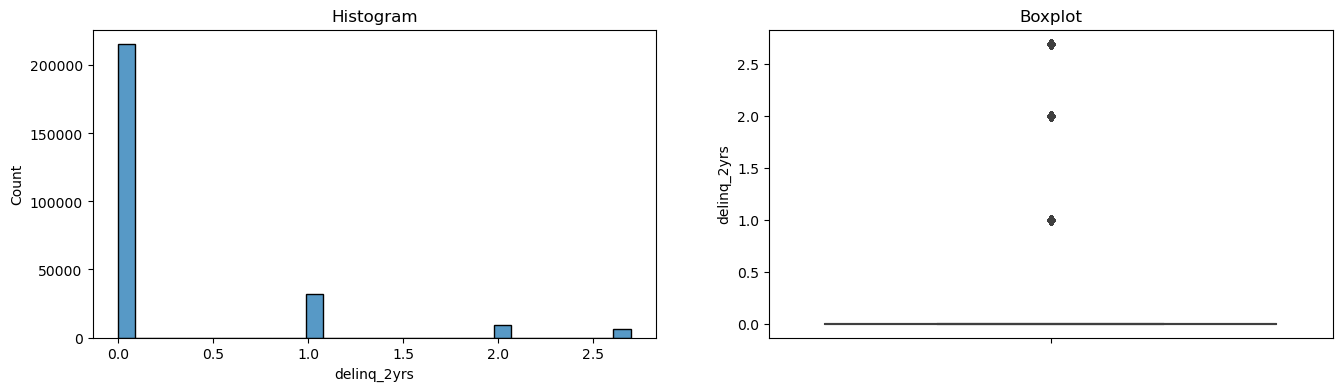

inq_last_6mths - Before Capping


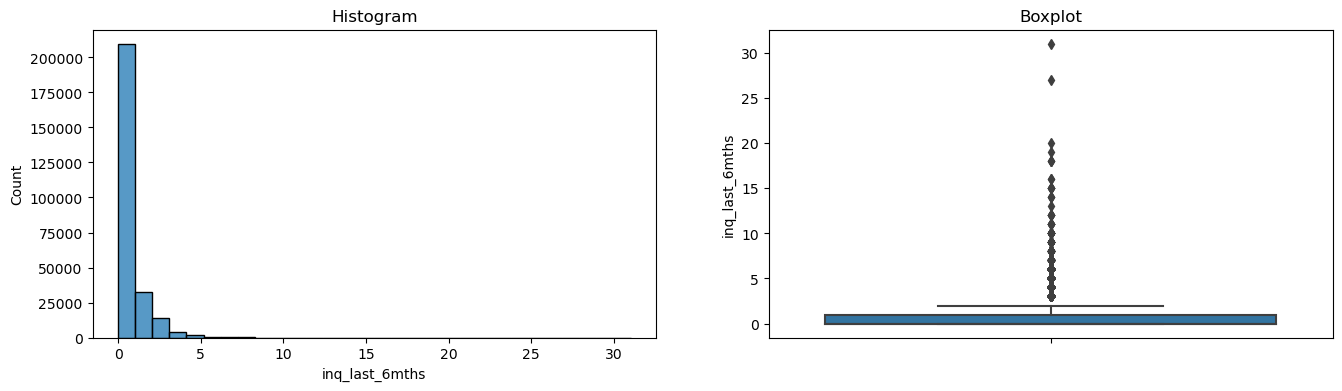


inq_last_6mths - After Capping


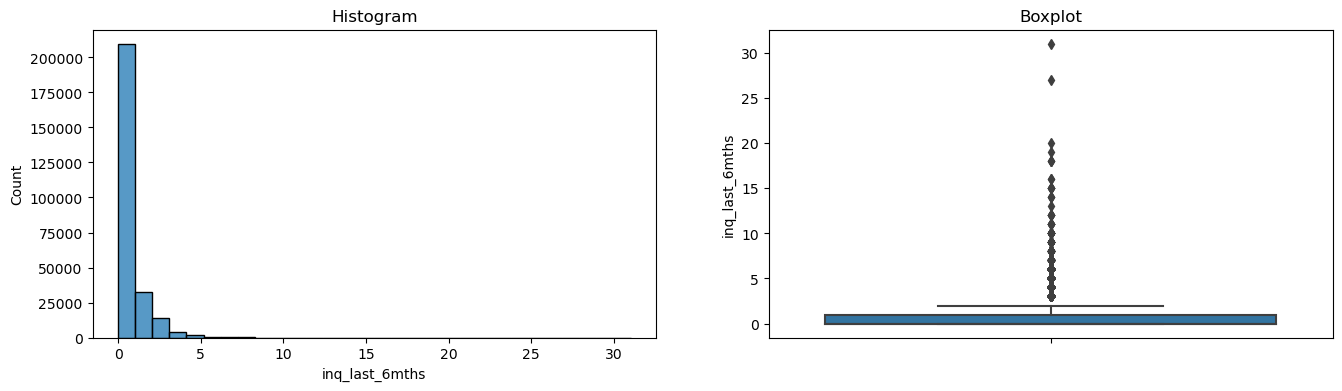

open_acc - Before Capping


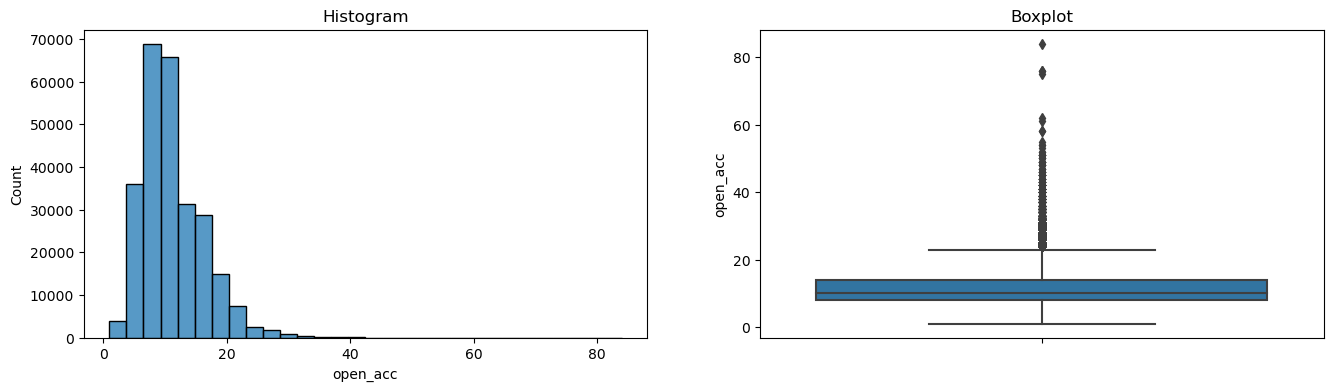


open_acc - After Capping


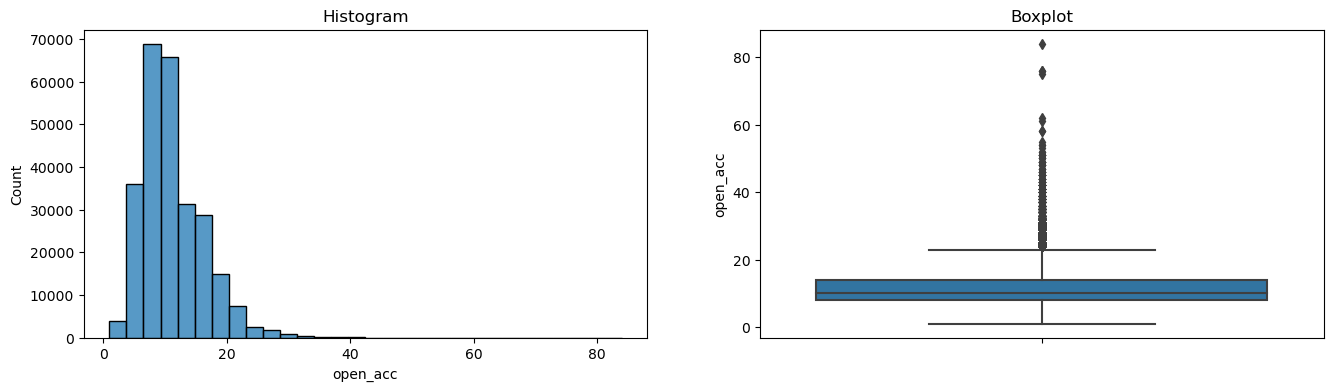

pub_rec - Before Capping


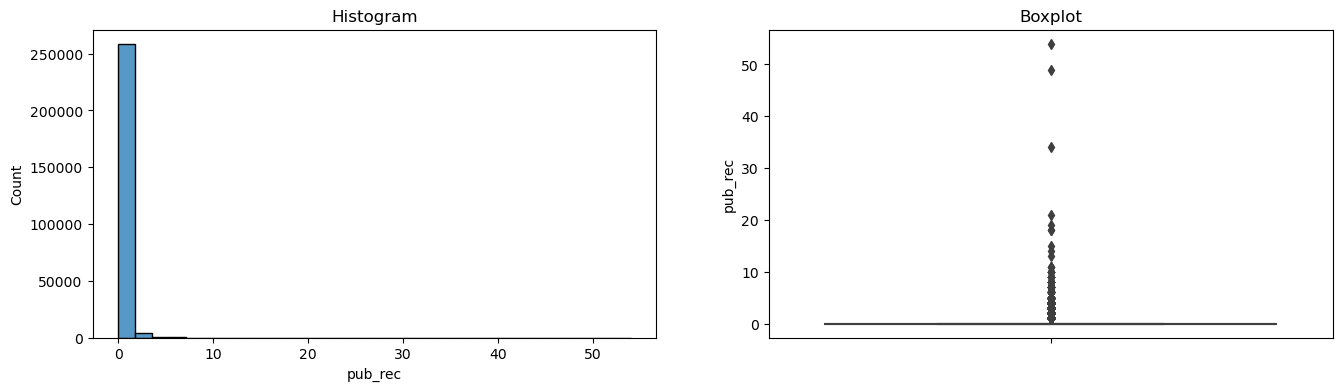


pub_rec - After Capping


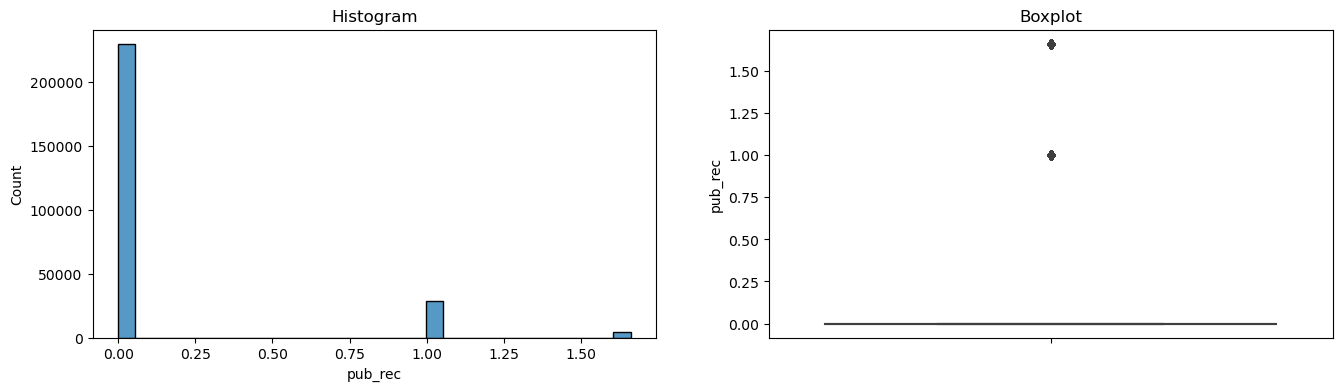

revol_bal - Before Capping


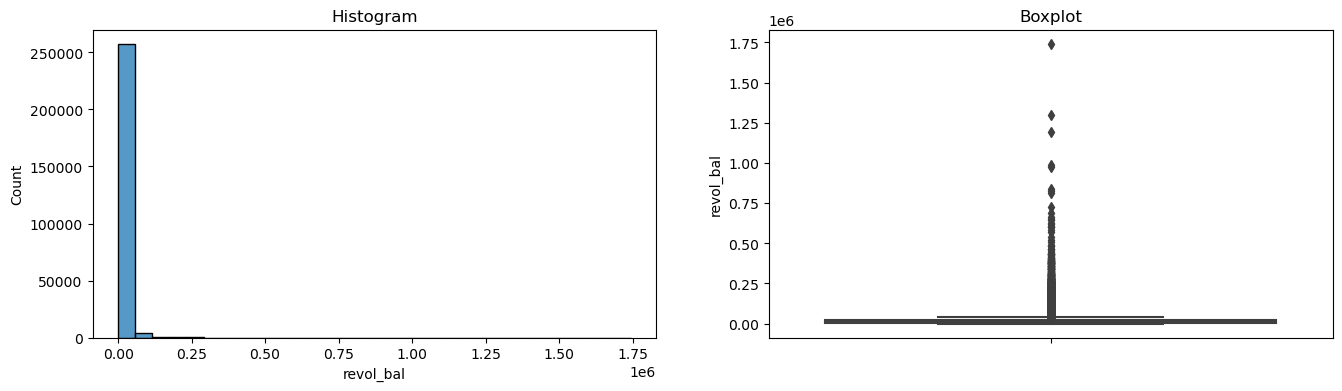


revol_bal - After Capping


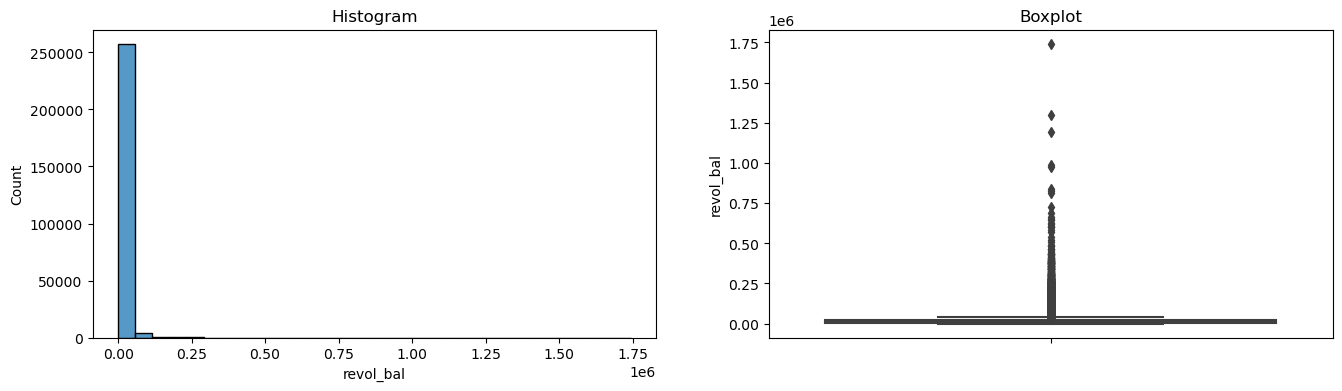

revol_util - Before Capping


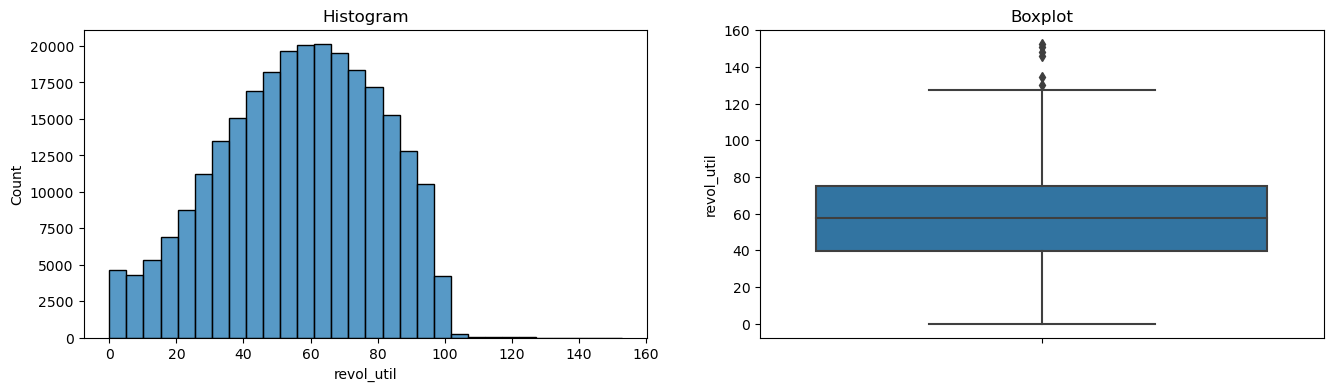


revol_util - After Capping


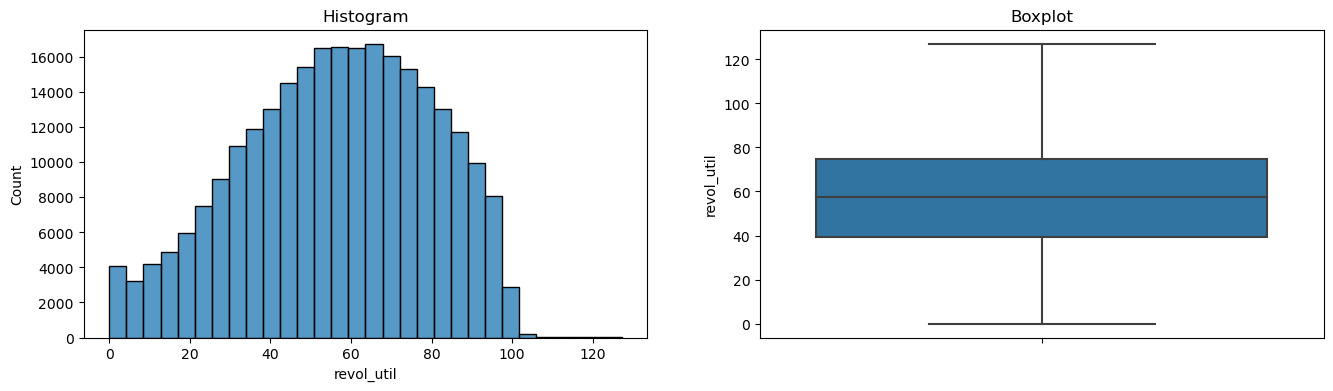

total_acc - Before Capping


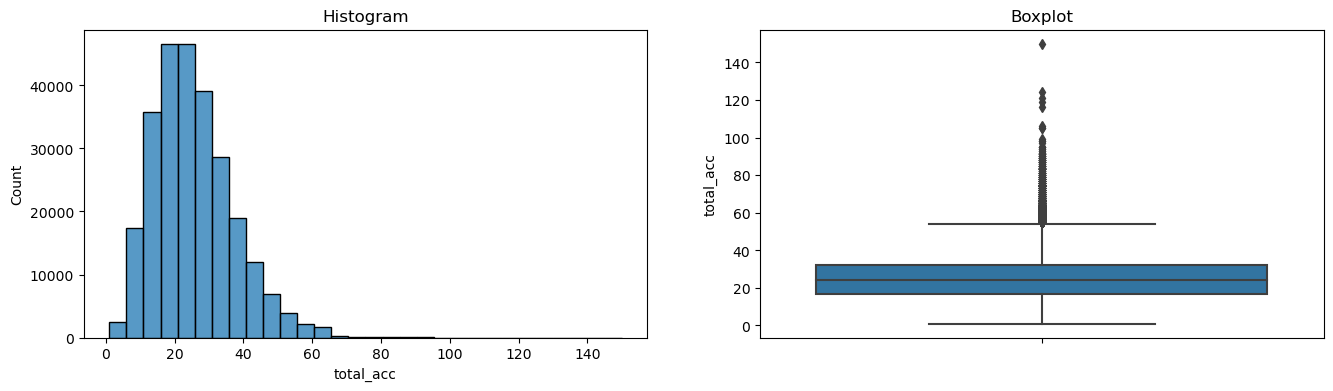


total_acc - After Capping


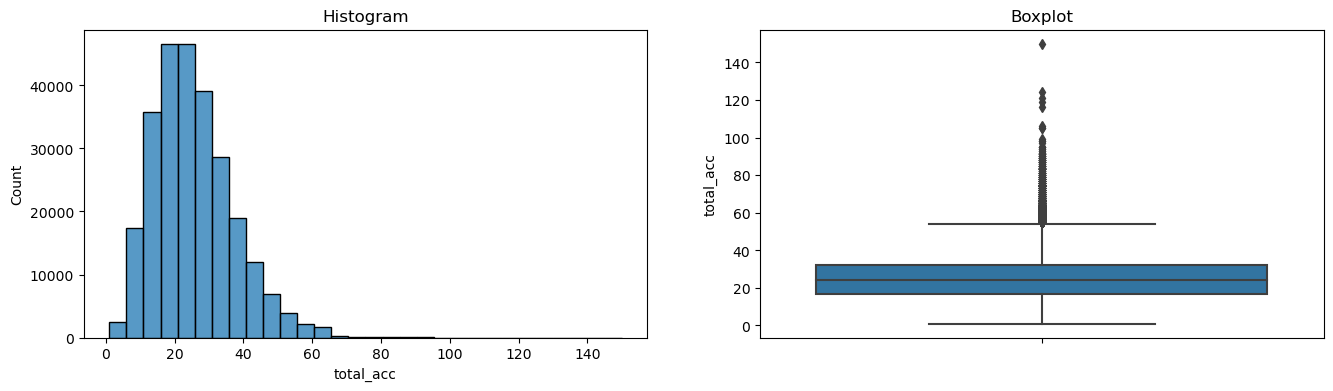

out_prncp - Before Capping


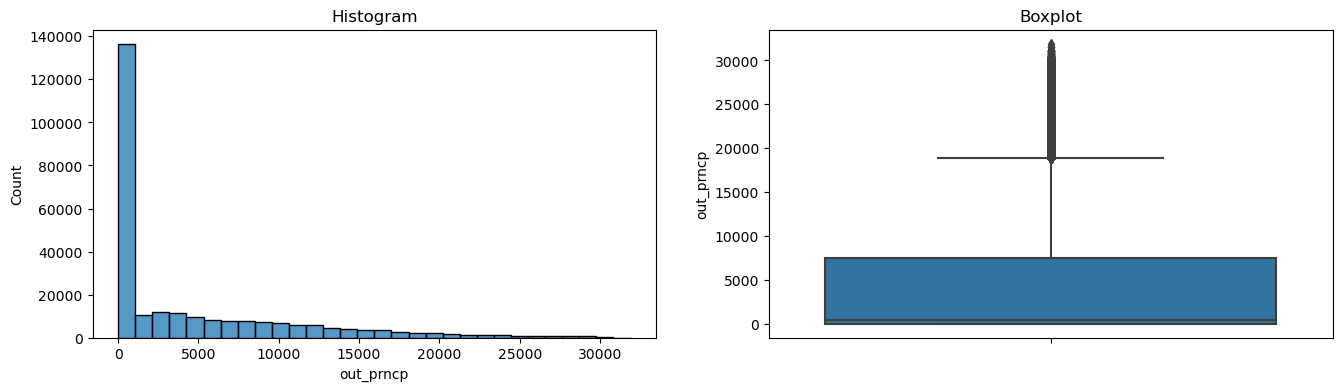


out_prncp - After Capping


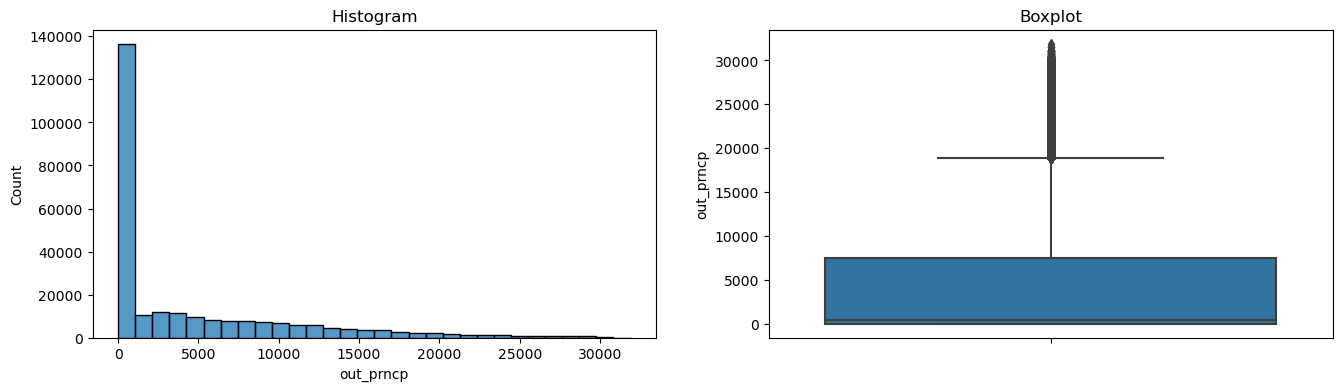

out_prncp_inv - Before Capping


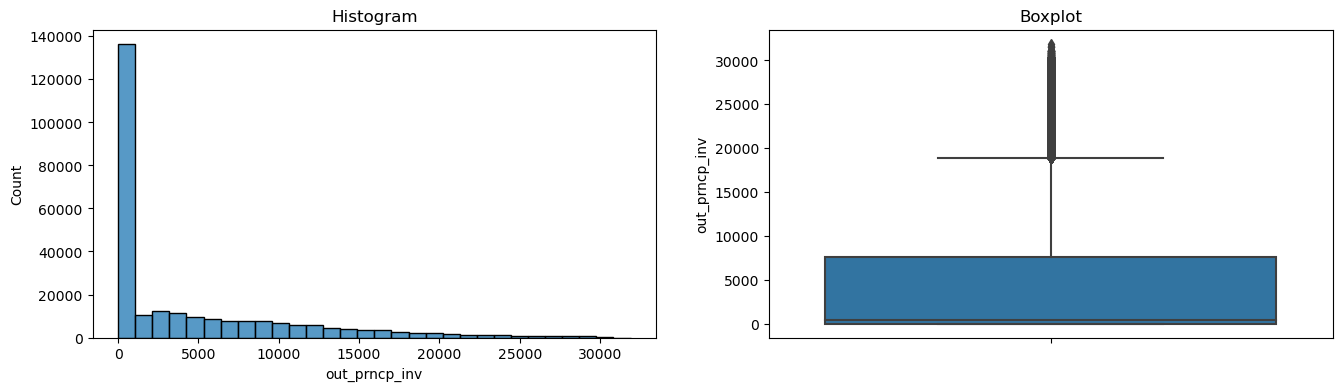


out_prncp_inv - After Capping


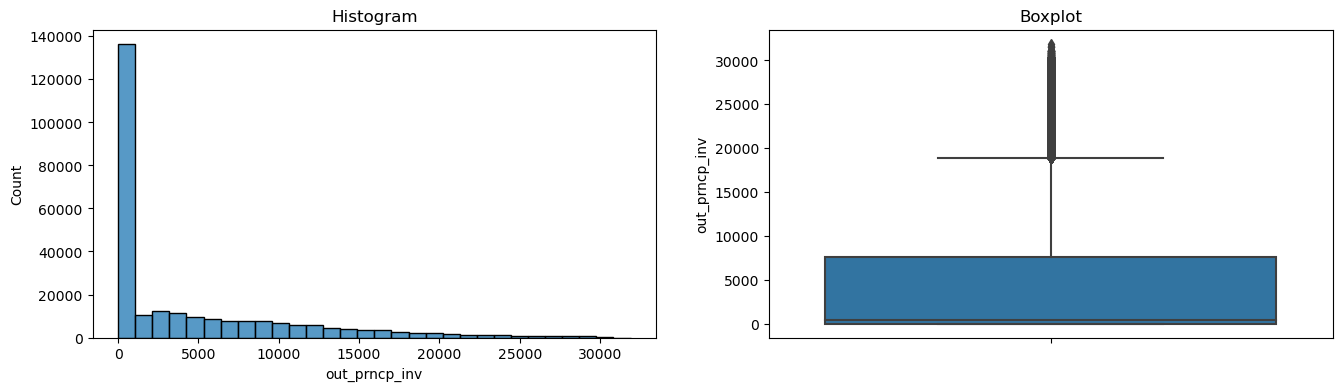

total_pymnt - Before Capping


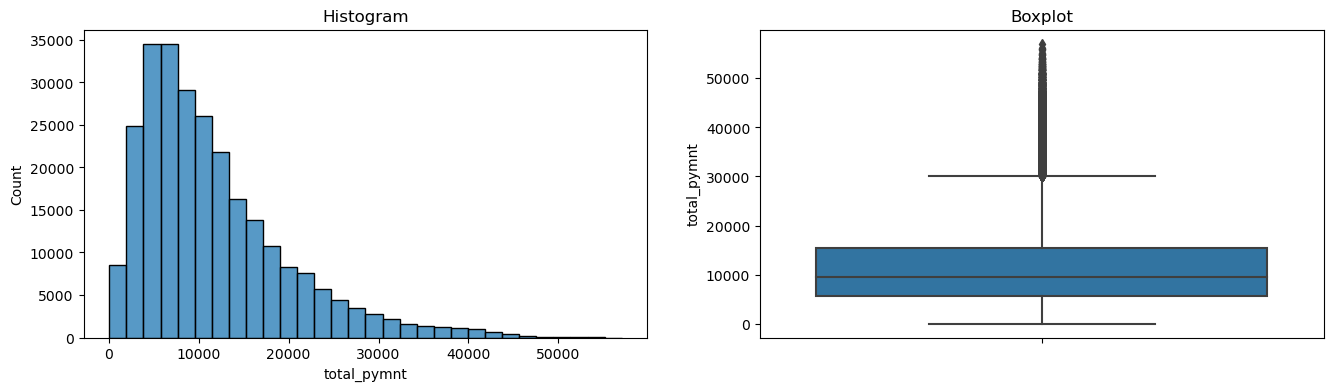


total_pymnt - After Capping


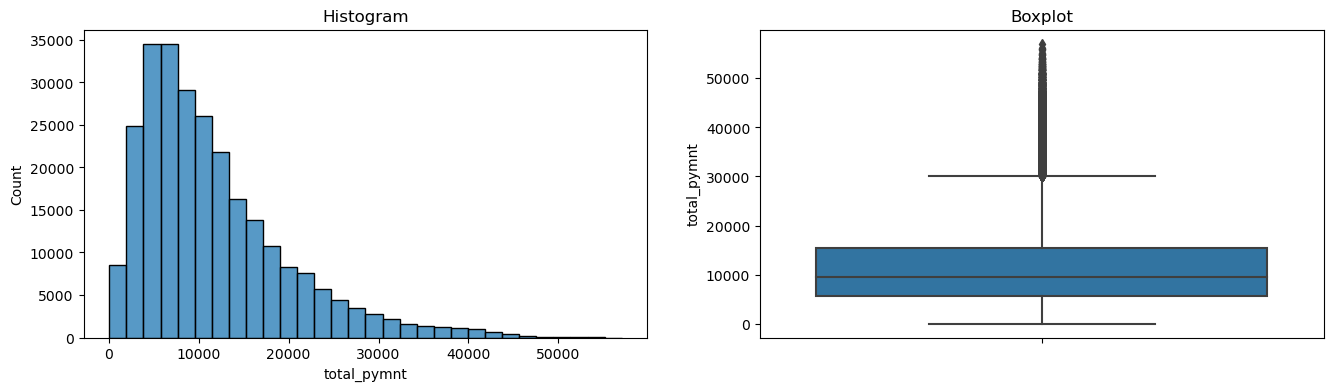

total_pymnt_inv - Before Capping


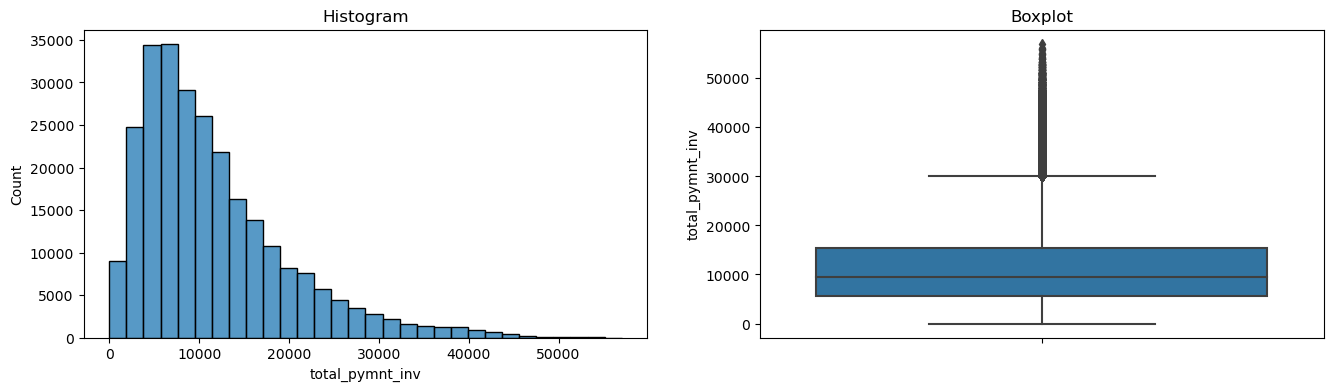


total_pymnt_inv - After Capping


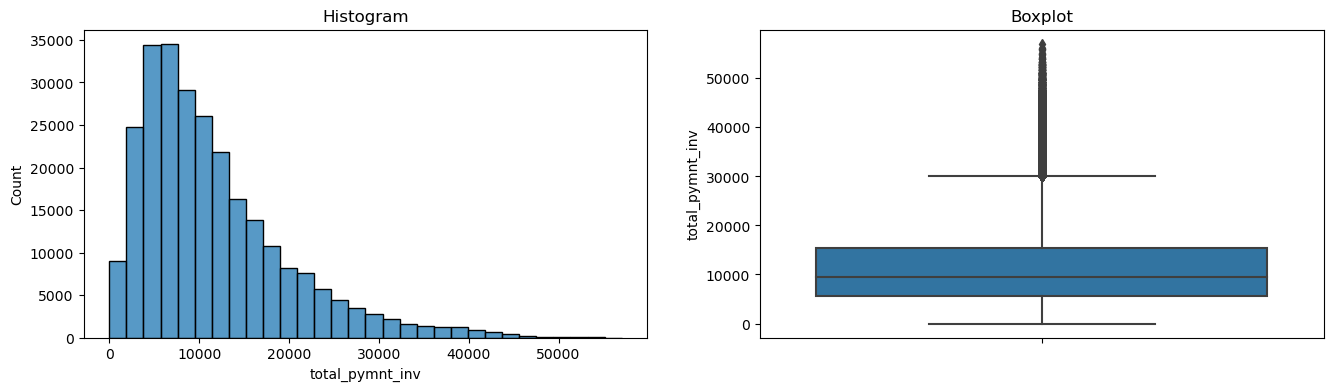

total_rec_prncp - Before Capping


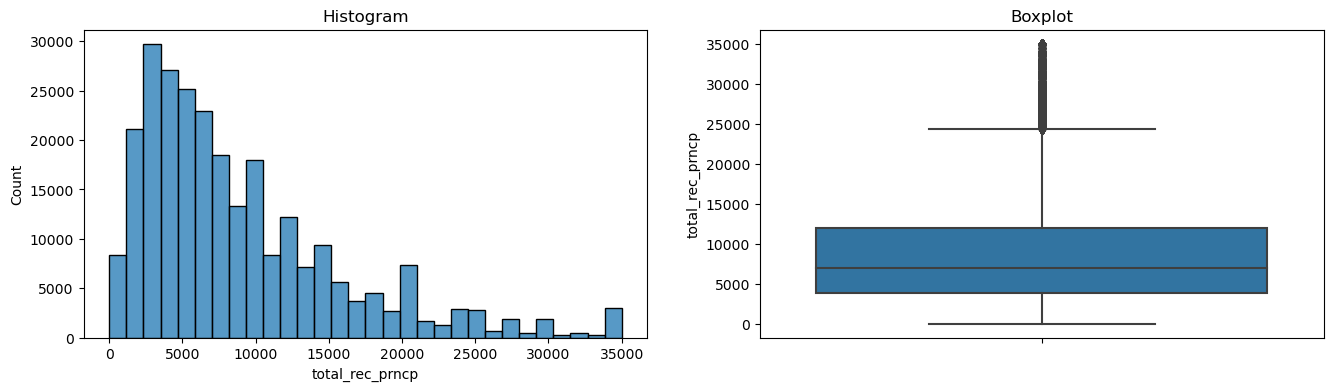


total_rec_prncp - After Capping


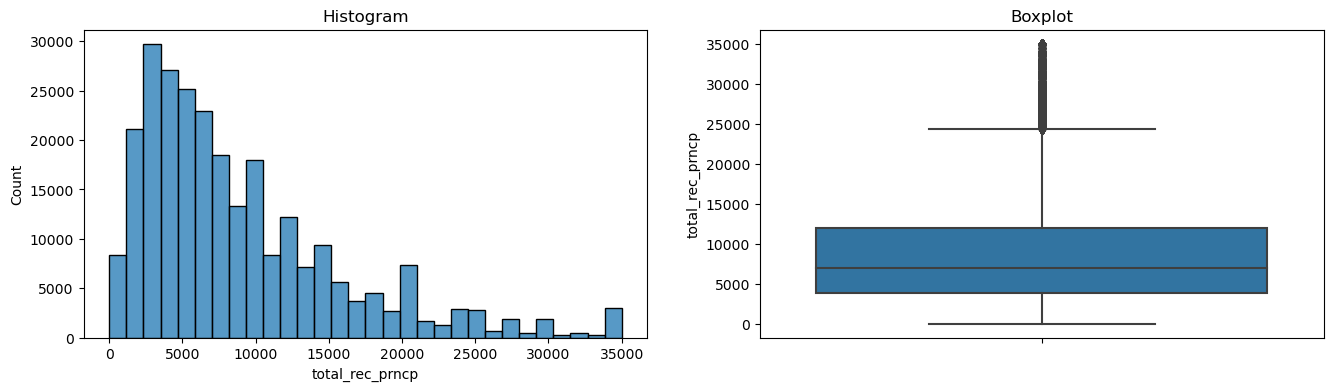

total_rec_int - Before Capping


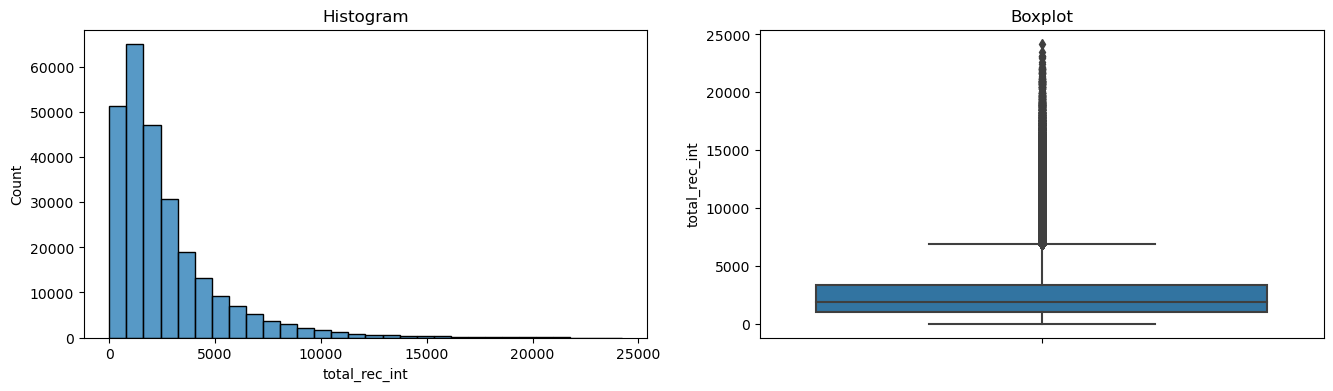


total_rec_int - After Capping


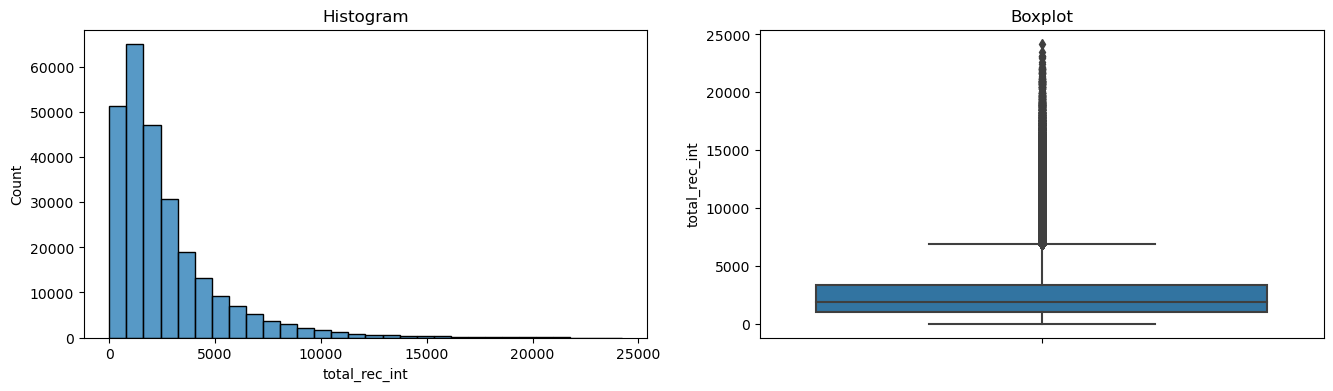

total_rec_late_fee - Before Capping


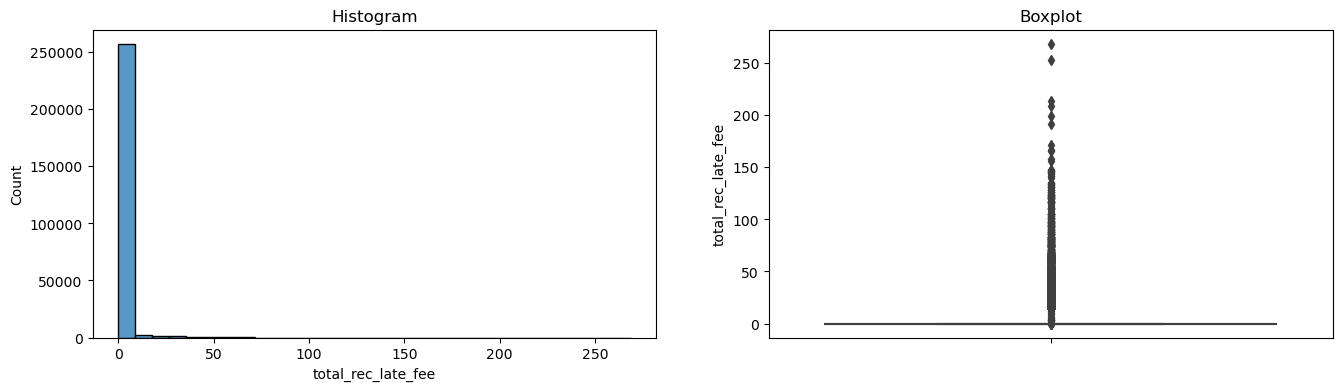


total_rec_late_fee - After Capping


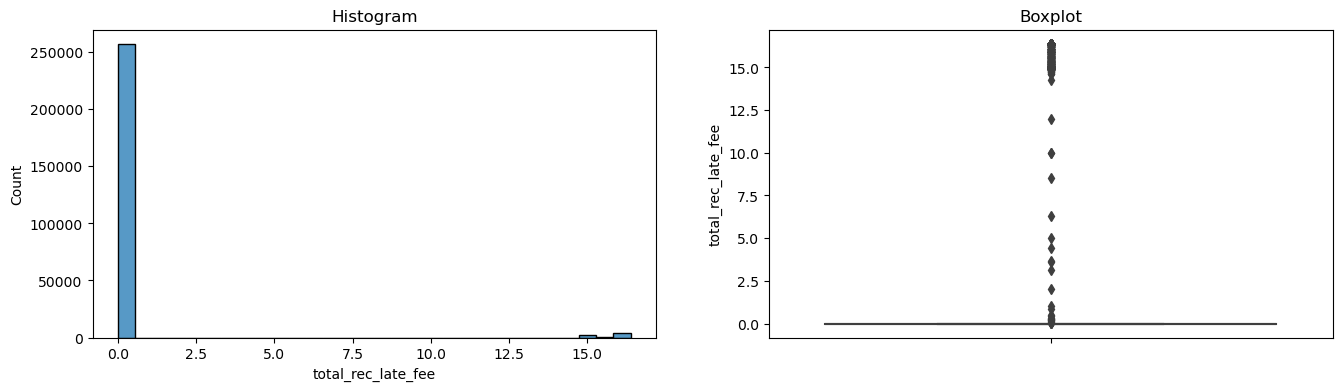

recoveries - Before Capping


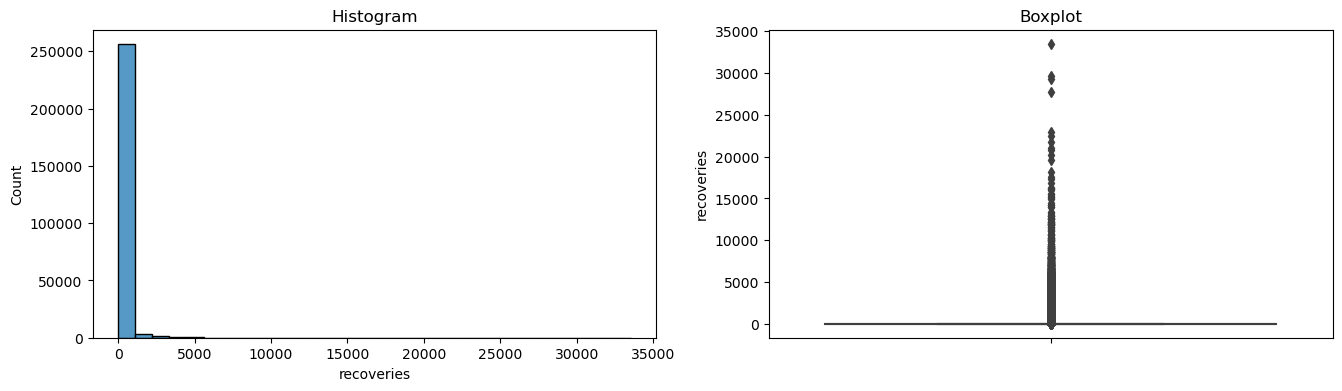


recoveries - After Capping


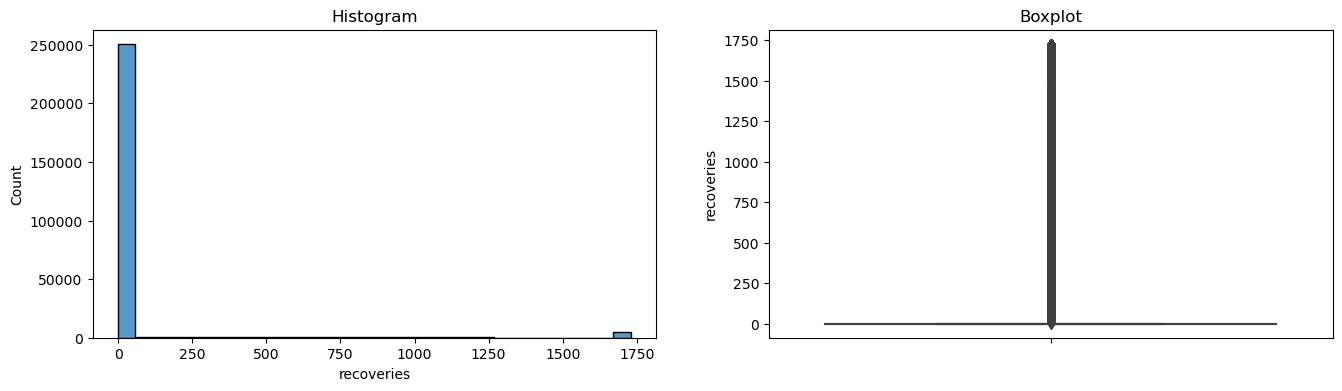

collection_recovery_fee - Before Capping


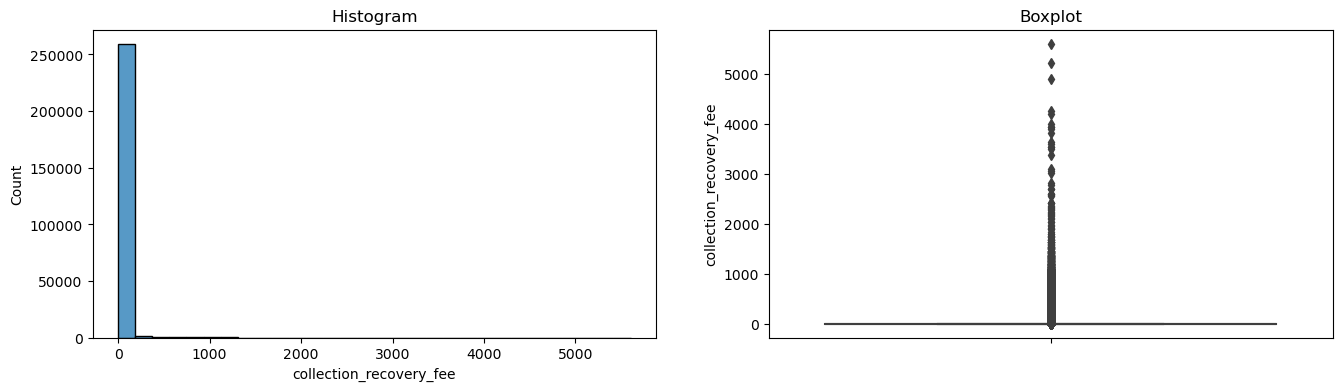


collection_recovery_fee - After Capping


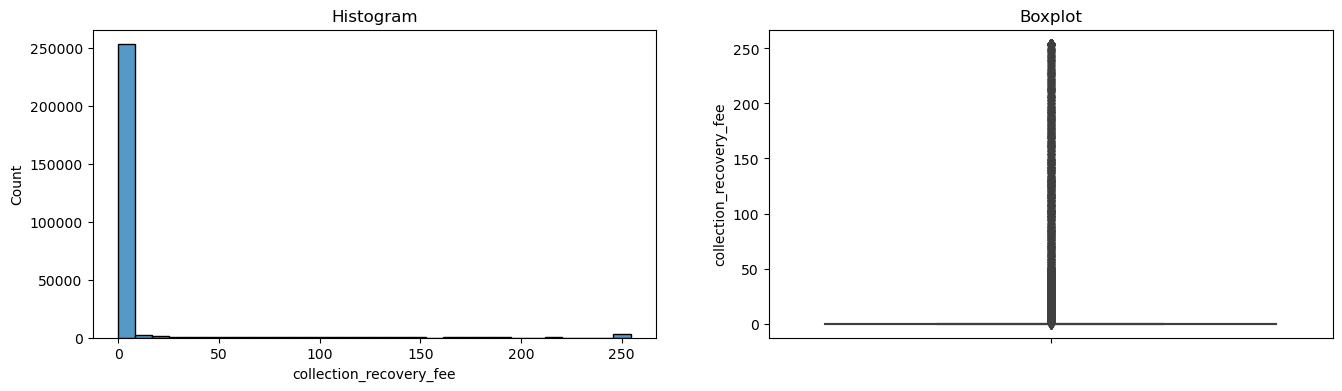

last_pymnt_amnt - Before Capping


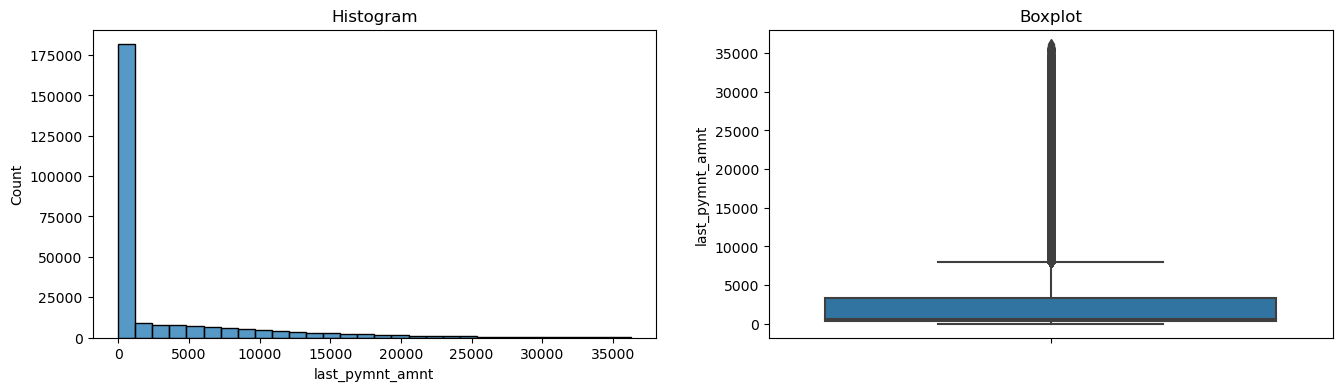


last_pymnt_amnt - After Capping


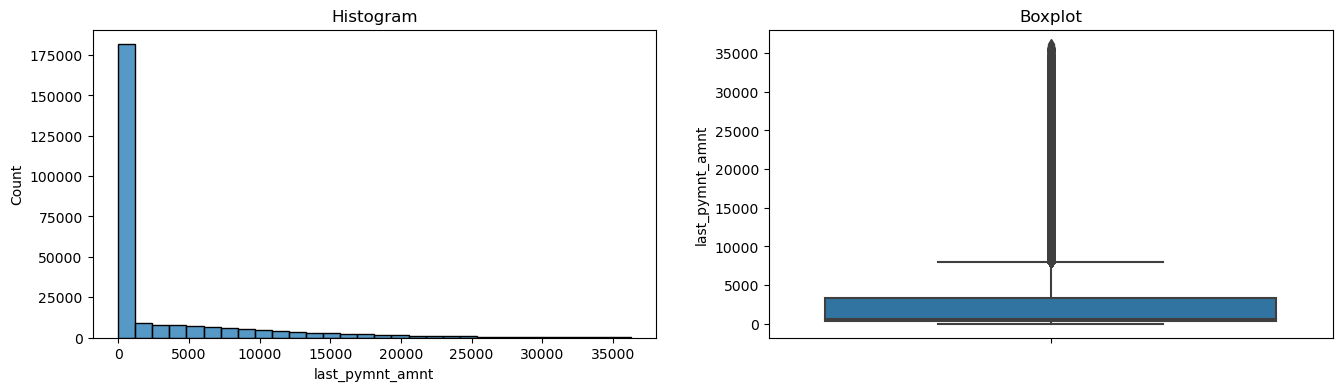

collections_12_mths_ex_med - Before Capping


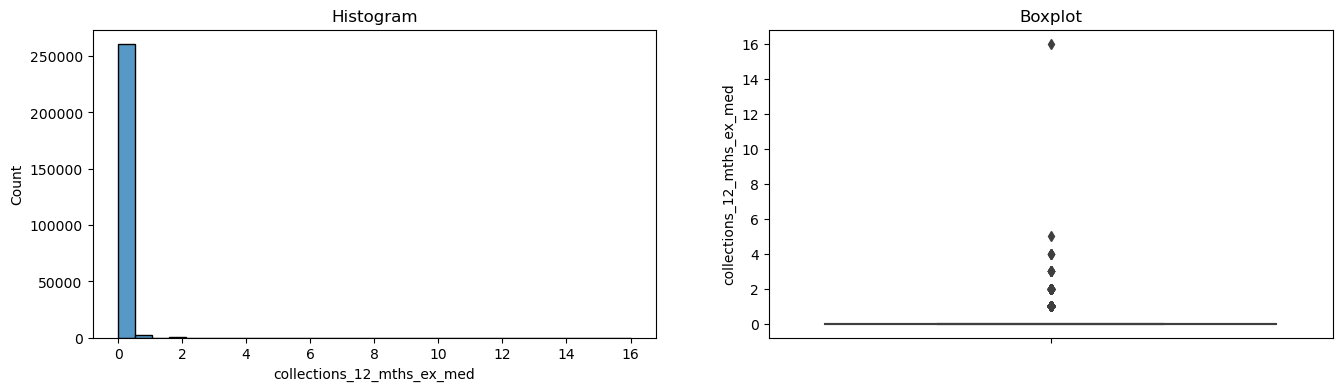


collections_12_mths_ex_med - After Capping


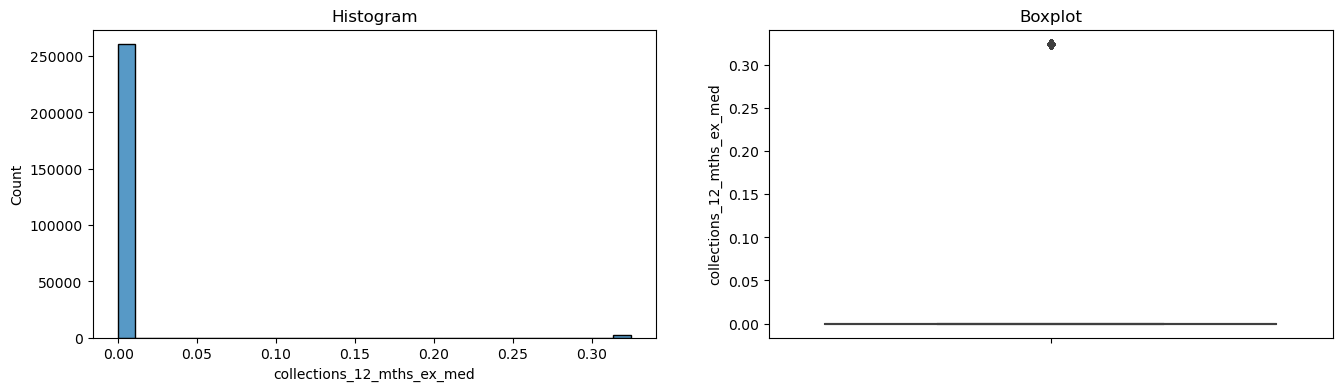

policy_code - Before Capping


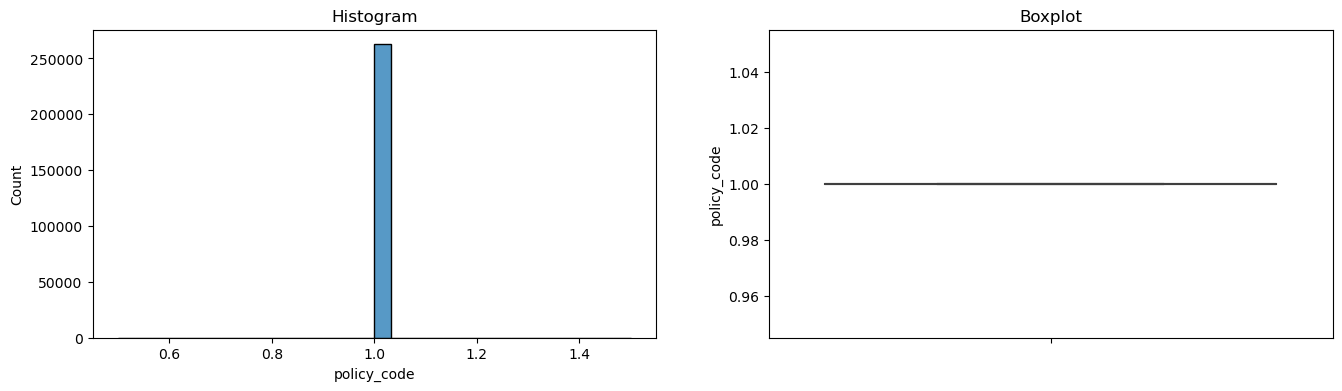


policy_code - After Capping


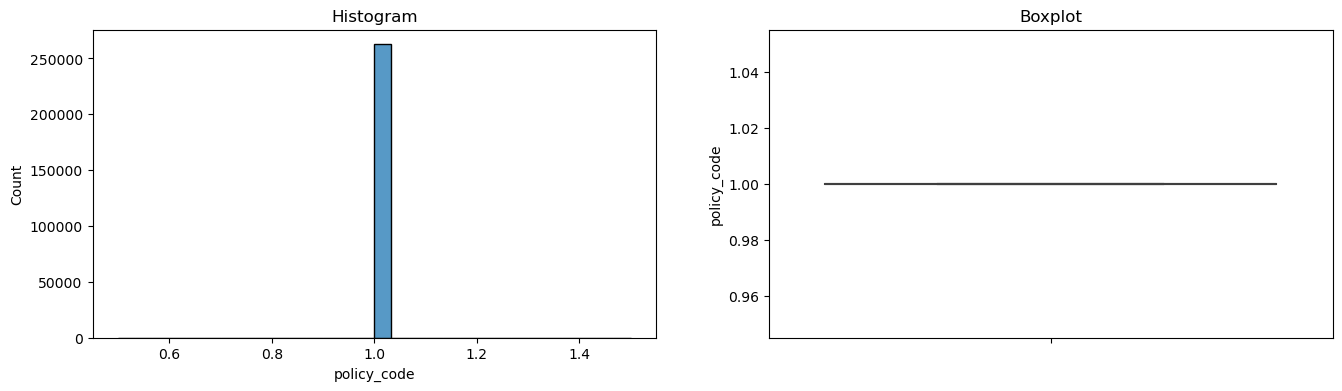

acc_now_delinq - Before Capping


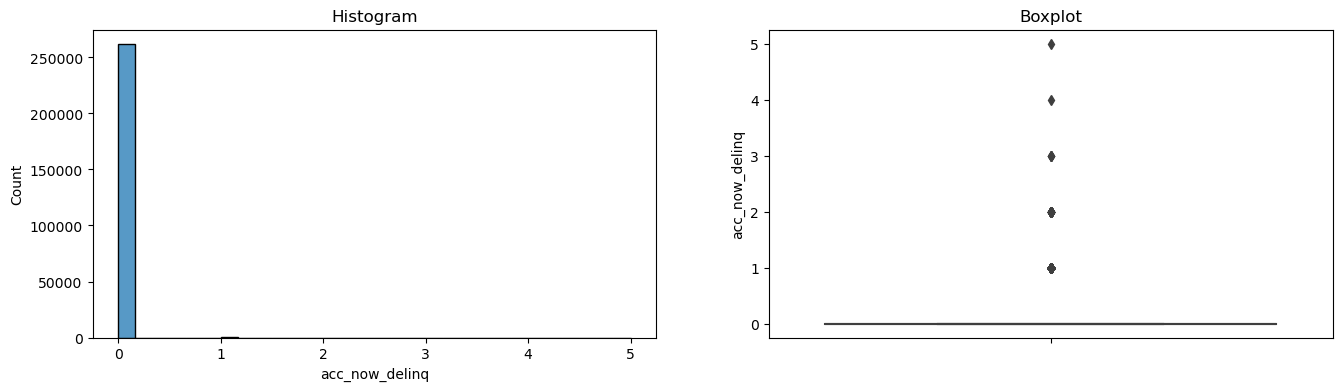


acc_now_delinq - After Capping


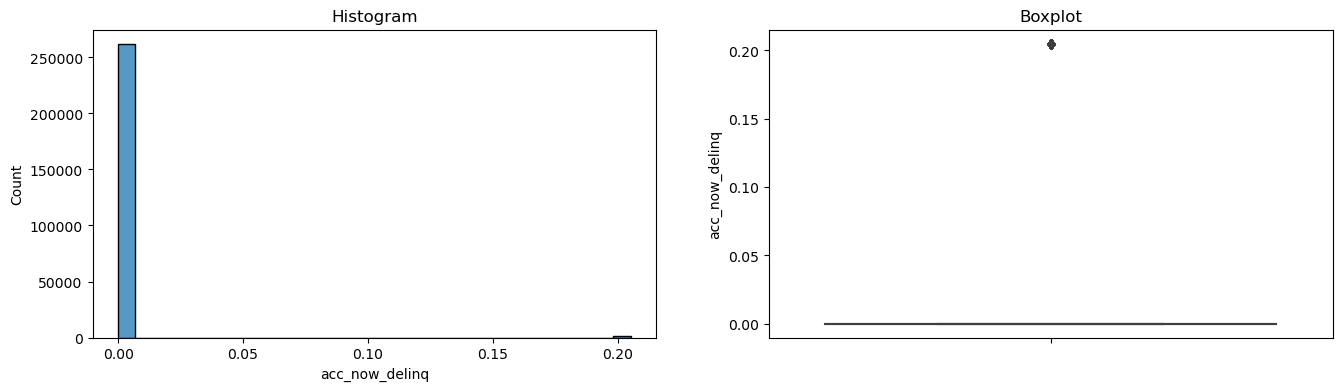

tot_coll_amt - Before Capping


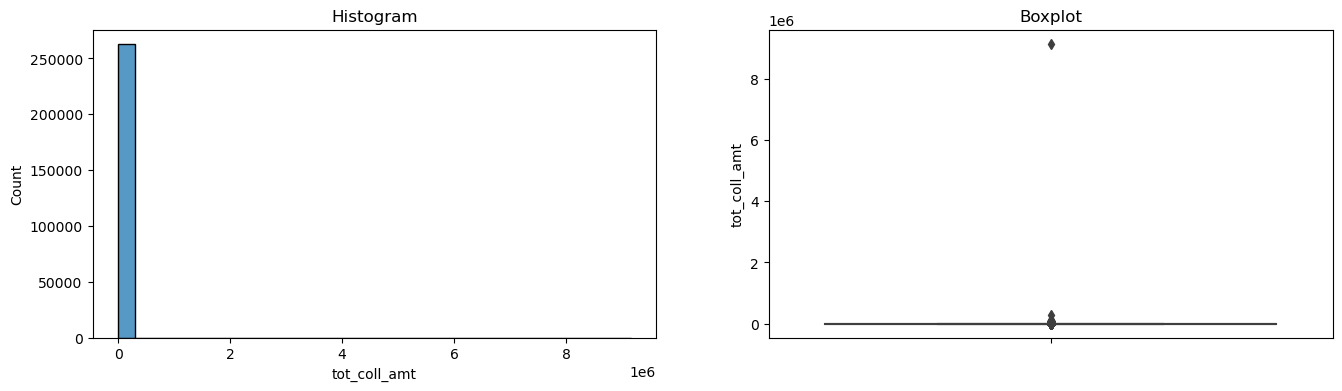


tot_coll_amt - After Capping


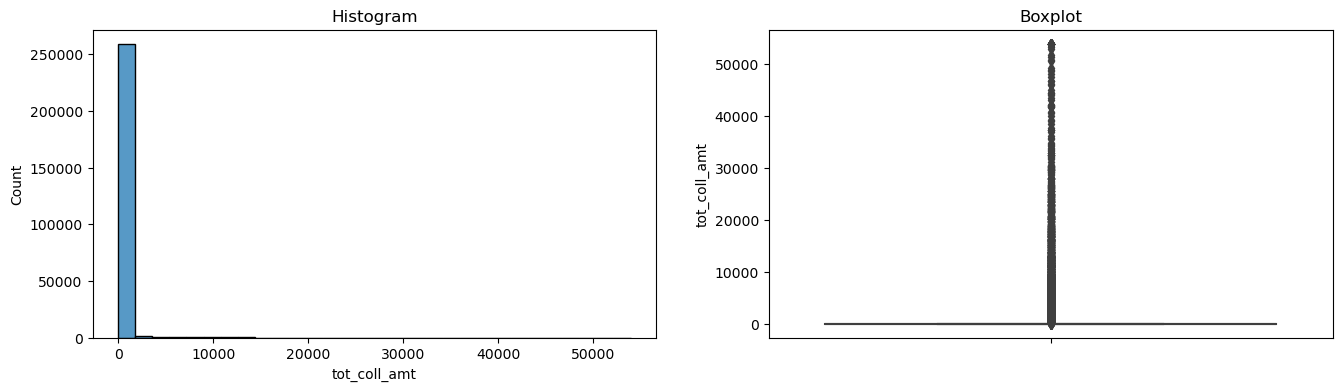

tot_cur_bal - Before Capping


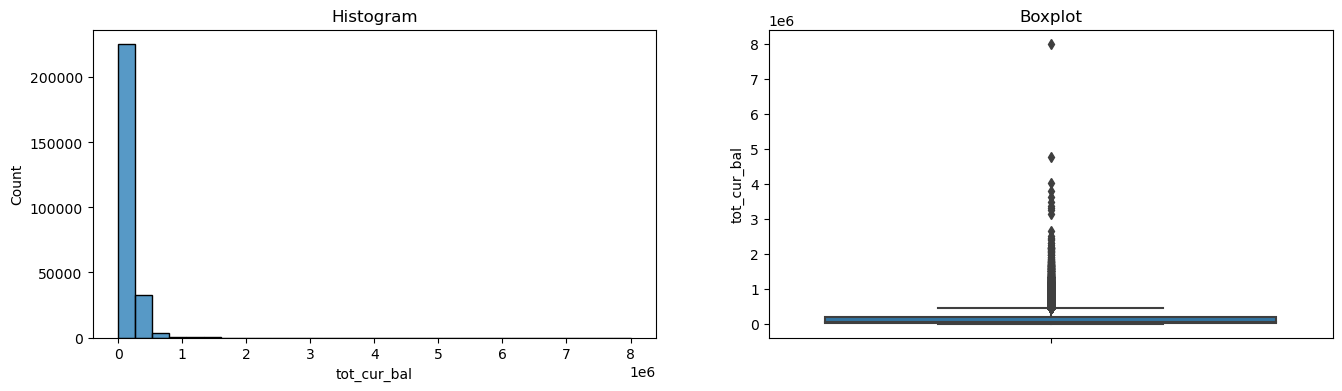


tot_cur_bal - After Capping


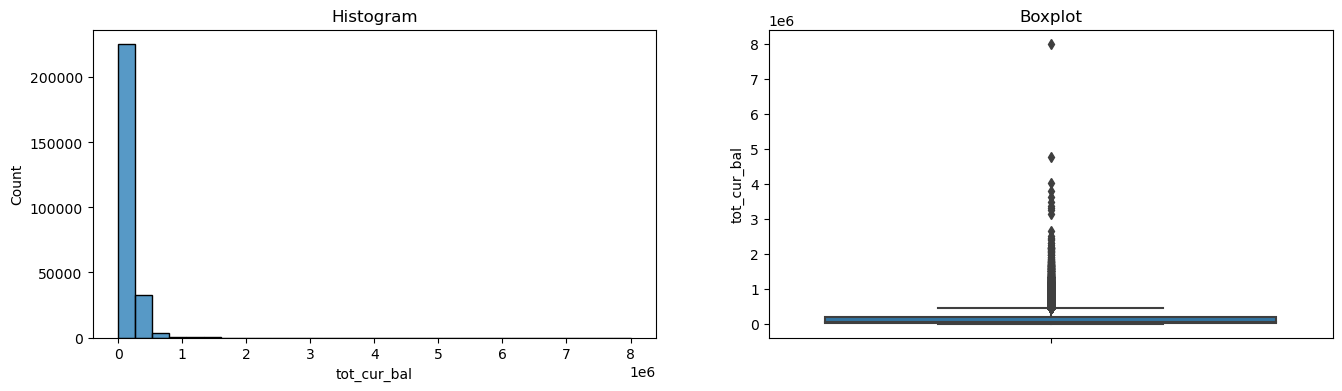

total_rev_hi_lim - Before Capping


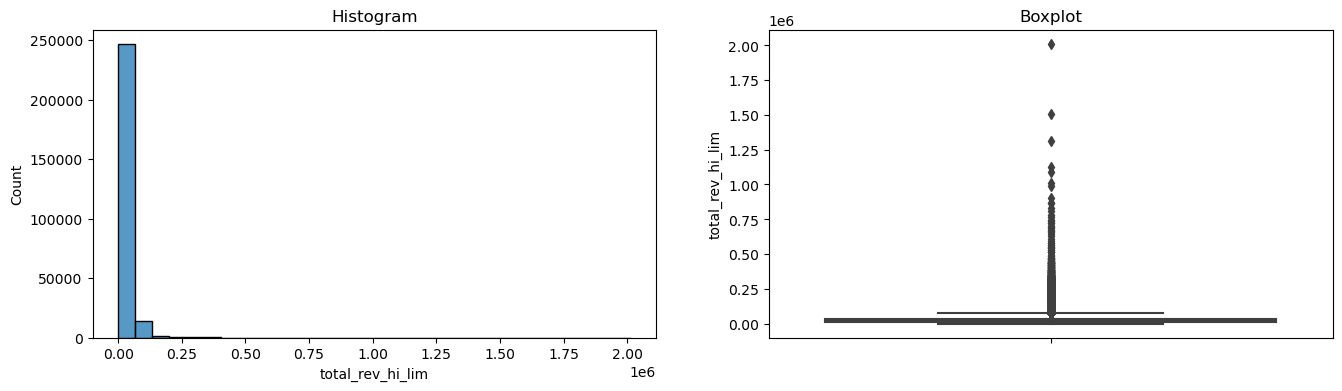


total_rev_hi_lim - After Capping


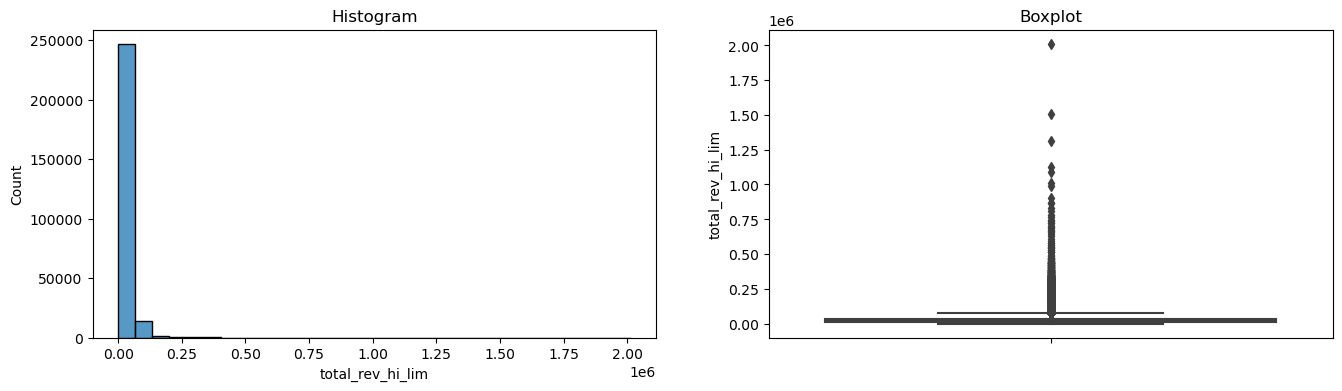

In [48]:
# Function to display histograms and boxplots from columns.
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()


for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

Based on capping result, there is still missing values but we can move to the next step.

## Handling Missing Value

In [49]:
#displays the number of missing values in the train data.

print("Null di X_train",X_train_capped.isnull().sum())


Null di X_train Unnamed: 0                    0
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int           

There are outliers in the resource allocation and mental fatigue score columns

In [50]:
#displays the number of missing values in the test data.

print("Null di X_test",X_test_capped.isnull().sum())


Null di X_test Unnamed: 0                    0
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int            

There are outliers in the resource allocation and mental fatigue score columns

In [51]:
#displays the number of missing values in the y train and test data.

print("Null di y_train",y_train.isnull().sum())
print("Null di y_test",y_test.isnull().sum())


Null di y_train 0
Null di y_test 0


Since we already dropped missing value, we can move to the next step.

## SMOTE

In [52]:
categorical_features = [6,9,10,11,13,14,15,24,37]

In [53]:
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

# Apply SMOTENC to the training data
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)
# Display the resampled data
print("Resampled feature matrix:\n", X_train_resampled.shape)
print("Resampled target vector:\n", y_train_resampled.shape)

Resampled feature matrix:
 (467748, 42)
Resampled target vector:
 (467748,)


## Feature Selection

In [54]:
#group categorical columns
cat_columns = (X_train_resampled.select_dtypes(include=['object','datetime64']).columns)

In [55]:
#group numerical columns

num_cols = (X_train_resampled.select_dtypes(exclude=['object','datetime64']).columns)

In [56]:
#syntax for calculating categorical column correlation using the kendalltau method

p_values = []
interpretasi = []
cols = []
corr = []


for col in cat_columns:
  corr_coef, p_value = kendalltau(X_train_resampled[col], y_train_resampled)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

corr_cat = pd.DataFrame({'column name':cols,
               'result': interpretasi,
               'pvalue':p_values,
               'Corr Value' : corr })

corr_cat

,column name,result,pvalue,Corr Value
0,term,ada korelasi,5.057153e-206,0.044784
1,grade,ada korelasi,0.000000e+00,0.224079
2,emp_length,ada korelasi,0.000000e+00,-0.070523
3,home_ownership,ada korelasi,0.000000e+00,0.109023
4,verification_status,ada korelasi,0.000000e+00,0.074894
5,pymnt_plan,ga ada korelasi,1.024686e-01,0.002388
6,purpose,ada korelasi,2.198536e-134,0.034458
7,initial_list_status,ada korelasi,0.000000e+00,-0.126972
8,application_type,ga ada korelasi,NaN,NaN


In [57]:
correlation_cat = list(corr_cat[corr_cat['result']== "ada korelasi"]['column name'])


In [58]:
#syntax to calculate numerical column correlation using the pearsonr method

p_values = []
interpretasi = []
cols = []
corr = []

for col in num_cols:
  corr_coef, p_value = pearsonr(X_train_resampled[col], y_train_resampled)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

corr_num = pd.DataFrame({'column name':cols,
               'result': interpretasi,
               'pvalue':p_values,
               'Corr Value' : corr })

c:\Users\D5att\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [59]:
correlation_num = list(corr_num[corr_num['result']== "ada korelasi"]['column name'])


But since Unnamed, ID, and member id is just an ID, we can drop it.

In [60]:
X_train_resampled.drop(columns=['Unnamed: 0','id','member_id'],inplace=True,axis=1)

__Result__  
Columns that have a correlation with the target will become features in the model.

## Encoding and Scaling

In [61]:
#select column for going through ColumnTransformer
correlation_cat

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status']

In [62]:
#select column for going through ColumnTransformer
correlation_num

['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

__Definition of ColumnTransformer__

In [64]:
#Assign ColumnTransformer to perform scaling and encoding on columns that have been determined in feature engineering
#Scaling using standardscaler and encoding using onehotencoder
prep = ColumnTransformer([
    ('scaler', StandardScaler(), [ 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']),
    ('encoding', OneHotEncoder(handle_unknown='ignore'),['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status'])])       

prep

ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
                                  'int_rate', 'installment', 'annual_inc',
                                  'dti', 'delinq_2yrs', 'inq_last_6mths',
                                  'open_acc', 'pub_rec', 'revol_bal',
                                  'revol_util', 'total_acc', 'out_prncp',
                                  'out_prncp_inv', 'total_pymnt',
                                  'total_pymnt_inv', 'total_rec_prncp',
                                  'total_rec_int', 'total_rec_late_fee',
                                  'recoveries', 'collection_recovery_fee',
                                  'last_pymnt_amnt',
                                  'collections_12_mths_ex_med',
                                  'acc_now_delinq', 'tot_coll_amt',
                                  'tot_cur_bal', 'total_rev_hi_lim']),
                                ('encoding',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['term', 'grade', 'emp_length',
                                  'home_ownership', 'verification_status',
                                  'purpose', 'initial_list_status'])])

ColumnTransformer has been successfully assigned

# Machine Learning

## Model Definition

In this notebook, 2 algorithm models will be used to credict risk prediction. These results will be compared and the best result will be hyperparameter tuning.
The model used is:
- Logistic Regression
- Random Forest Classification

The chosen metrics for evaluation are Accuracy and F1 Score, since we have balanced dataset. Accuracy can be used and only be used with balance dataset.

In [87]:
#Model Definition Logistic Regression
pipe_logreg = Pipeline([
('transformer', prep),
('classifier', LogisticRegression())
])


#Model Definition Random Forest Classifier
pipe_RF = Pipeline([
('transformer', prep),
('classifier', RandomForestClassifier())
])


In [129]:
pipe_RF

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'int_rate', 'installment',
                                                   'annual_inc', 'dti',
                                                   'delinq_2yrs',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'revol_util', 'total_acc',
                                                   'out_prncp', 'out_prncp_inv',
                                                   'total_pymnt',
                                                   'total_pymnt_inv',
                                                   'total_rec_prncp',
                                                   'tot...
                                                   'recoveries',
                                                   'collection_recovery_fee',
                                                   'last_pymnt_amnt',
                                                   'collections_12_mths_ex_med',
                                                   'acc_now_delinq',
                                                   'tot_coll_amt',
                                                   'tot_cur_bal',
                                                   'total_rev_hi_lim']),
                                                 ('encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['term', 'grade',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'purpose',
                                                   'initial_list_status'])])),
                ('classifier', RandomForestClassifier())])

## Model Logistic Regression

In [88]:
#the model is fitted to the train data
pipe_logreg.fit(X_train_resampled, y_train_resampled)

#the model learns X test data
y_logreg_pred_train = pipe_logreg.predict(X_train_resampled)
y_logreg_pred_test = pipe_logreg.predict(X_test_capped)

In [99]:
#Classification report for this model

target = ['Fully Paid', 'Default']
print(classification_report(y_test, y_logreg_pred_test, target_names = target))

              precision    recall  f1-score   support

  Fully Paid       0.98      1.00      0.99     77943
     Default       0.97      0.83      0.89      9599

    accuracy                           0.98     87542
   macro avg       0.97      0.91      0.94     87542
weighted avg       0.98      0.98      0.98     87542



The classification report reveals that the model achieves a high accuracy of approximately 98% on the test dataset. However, when examining the F1 score, it becomes evident that the model is overfitting, with an F1 score of 99% for the "fully paid" class and 89% for the "default" class. This discrepancy suggests that while the model performs well overall, it may be overly optimistic in predicting "fully paid" instances, potentially at the expense of correctly identifying "default" cases.

In [105]:
#Cross Validation pada Model

f1_train_cross_val = cross_val_score(pipe_logreg,
                                     X_val,
                                     y_val,
                                     cv=5,
                                     scoring="f1")

print('f1 - All - Cross Validation  : ', f1_train_cross_val)
print('f1 - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('f1 - Std - Cross Validation  : ', f1_train_cross_val.std())
print('f1 - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

f1 - All - Cross Validation  :  [0.88824214 0.89521045 0.88252484 0.88688047 0.89121582]
f1 - Mean - Cross Validation :  0.8888147441707238
f1 - Std - Cross Validation  :  0.004249763274123367
f1 - Range of Test-Set       :  0.8845649808966004 - 0.8930645074448472


The cross-validation results on the validation data show that the model achieves an average score of 0.88, with a standard deviation of 0.004. This indicates that the model maintains consistent performance across different folds during cross-validation, demonstrating its stability and reliability.

## Model Random Forest Classifer

In [92]:
#the model is fitted to the train data
pipe_RF.fit(X_train_resampled, y_train_resampled)

#the model learns X test data
y_RF_pred_train = pipe_RF.predict(X_train_resampled)
y_RF_pred_test = pipe_RF.predict(X_test_capped)

In [94]:
#Nilai classification report model ini
target = ['Fully Paid', 'Default']
print(classification_report(y_test, y_RF_pred_test, target_names = target))

              precision    recall  f1-score   support

  Fully Paid       0.98      1.00      0.99     77943
     Default       0.96      0.85      0.90      9599

    accuracy                           0.98     87542
   macro avg       0.97      0.92      0.95     87542
weighted avg       0.98      0.98      0.98     87542



The model demonstrates a high accuracy of 98%. However, when comparing the accuracy with the F1 score, it is evident that the model tends to overfit. The F1 score is 99% for the "fully paid" class and 90% for the "default" class. This suggests that while the model is highly accurate, it may be overly optimistic in predicting "fully paid" instances, potentially overlooking some "default" cases.

In [107]:
#Cross Validation pada Model

f1_train_cross_val = cross_val_score(pipe_RF,
                                     X_val,
                                     y_val,
                                     cv=5,
                                     scoring="f1")

print('f1 - All - Cross Validation  : ', f1_train_cross_val)
print('f1 - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('f1 - Std - Cross Validation  : ', f1_train_cross_val.std())
print('f1 - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

f1 - All - Cross Validation  :  [0.89881125 0.90060852 0.88510138 0.89258611 0.89907193]
f1 - Mean - Cross Validation :  0.8952358364084116
f1 - Std - Cross Validation  :  0.00576356028841084
f1 - Range of Test-Set       :  0.8894722761200008 - 0.9009993966968225


The cross-validation results for the random forest model show an average F1 score of 89%, with a standard deviation of 0.005. This indicates that the model consistently maintains its performance when predicting validation data during cross-validation, demonstrating its stability and reliability.

## Comparing Model

In [109]:
models = {
    'Logreg' : pipe_logreg,
    'Random Forest' : pipe_RF,


}

metrics = {
    'accuracy' : accuracy_score,
    'f1 score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['accuracy', 'f1 score'])

for metric in metrics.keys():
  for model in models.keys():
      df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test_capped))
    
df_model.T

,accuracy,f1 score
Logreg,0.978102,0.892091
Random Forest,0.97969,0.901496


It can be observed that when comparing the two models using accuracy and F1 score metrics, their results are quite similar. Therefore, the model chosen for predict is Random Forest.

## Model Saving

In [124]:
#model saving

with open('model.pkl', 'wb') as file_1:
  pickle.dump(pipe_RF, file_1)

# Inference

In [125]:
#the model learns X test data
y_logreg_pred_val = pipe_logreg.predict(X_val)

In [127]:
#input new predict to dataset
X_val['predict'] = y_logreg_pred_val

In [128]:
#showing dataset
X_val

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,predict
384696,384696,16552453,18664957,14025,14025,14025,36 months,13.35,474.93,C,7 years,RENT,37000,Source Verified,n,credit_card,28.71,0,1,7,0,10359,52.9,26,w,7319.19,7319.19,9023.670000,9023.67,6705.81,2317.86,0.0,0.0,0.0,474.93,0,1,INDIVIDUAL,0,170,43977,19600,0
65767,65767,8638933,1476580,20950,20950,20950,36 months,13.67,712.67,B,10+ years,RENT,47000,Source Verified,n,debt_consolidation,29.39,0,0,11,0,27597,86.9,19,f,6699.91,6699.91,18545.840000,18545.84,14250.09,4295.75,0.0,0.0,0.0,729.36,0,1,INDIVIDUAL,0,0,28578,31600,0
410694,410694,14167826,16220212,8500,8500,8500,36 months,13.65,289.07,C,< 1 year,MORTGAGE,120000,Source Verified,n,home_improvement,10.62,0,0,11,3,18963,40.8,26,f,0.00,0.00,9476.100000,9476.10,8500.00,976.10,0.0,0.0,0.0,6476.10,0,1,INDIVIDUAL,0,0,239983,46500,0
418275,418275,13188367,15220524,12500,12500,12500,36 months,9.67,401.41,B,10+ years,MORTGAGE,94000,Source Verified,n,credit_card,11.06,0,1,6,0,12559,81.0,20,f,5649.94,5649.94,8429.610000,8429.61,6850.06,1579.55,0.0,0.0,0.0,401.41,0,1,INDIVIDUAL,0,0,30765,15500,0
146678,146678,4310999,5493676,15750,15750,15750,60 months,18.49,404.16,D,5 years,MORTGAGE,90000,Verified,n,debt_consolidation,34.64,1,1,17,0,20124,94.0,31,w,0.00,0.00,5254.080000,5254.08,2304.70,2949.38,0.0,0.0,0.0,404.16,0,1,INDIVIDUAL,0,0,325661,21400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140406,140406,4975193,6277365,8125,8125,8125,36 months,10.16,262.79,B,6 years,MORTGAGE,40000,Verified,n,debt_consolidation,17.64,0,1,13,0,24439,43.5,20,f,0.00,0.00,8932.135039,8932.14,8125.00,807.14,0.0,0.0,0.0,5521.36,0,1,INDIVIDUAL,0,0,200702,56200,0
13354,13354,784346,987547,9600,9600,9600,36 months,9.99,309.72,B,< 1 year,MORTGAGE,78000,Source Verified,n,medical,6.66,0,1,8,0,4548,45.5,20,f,0.00,0.00,10483.610000,10483.61,9600.00,883.61,0.0,0.0,0.0,6777.44,0,1,INDIVIDUAL,0,0,0,0,0
368293,368293,19086113,21288839,25000,25000,25000,60 months,16.29,611.82,D,10+ years,MORTGAGE,95000,Source Verified,n,debt_consolidation,18.89,2,3,16,0,16612,43.7,30,f,19486.99,19486.99,11012.760000,11012.76,5513.01,5499.75,0.0,0.0,0.0,611.82,0,1,INDIVIDUAL,0,0,194049,38000,0
233576,233576,36241607,38953039,29975,29975,29975,60 months,12.39,672.70,C,2 years,MORTGAGE,60000,Source Verified,n,credit_card,11.52,0,0,12,0,31965,58.8,28,w,24949.42,24949.42,8703.830000,8703.83,5025.58,3678.25,0.0,0.0,0.0,672.70,0,1,INDIVIDUAL,0,0,200697,54400,0
